<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_550-600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2269]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [2270]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

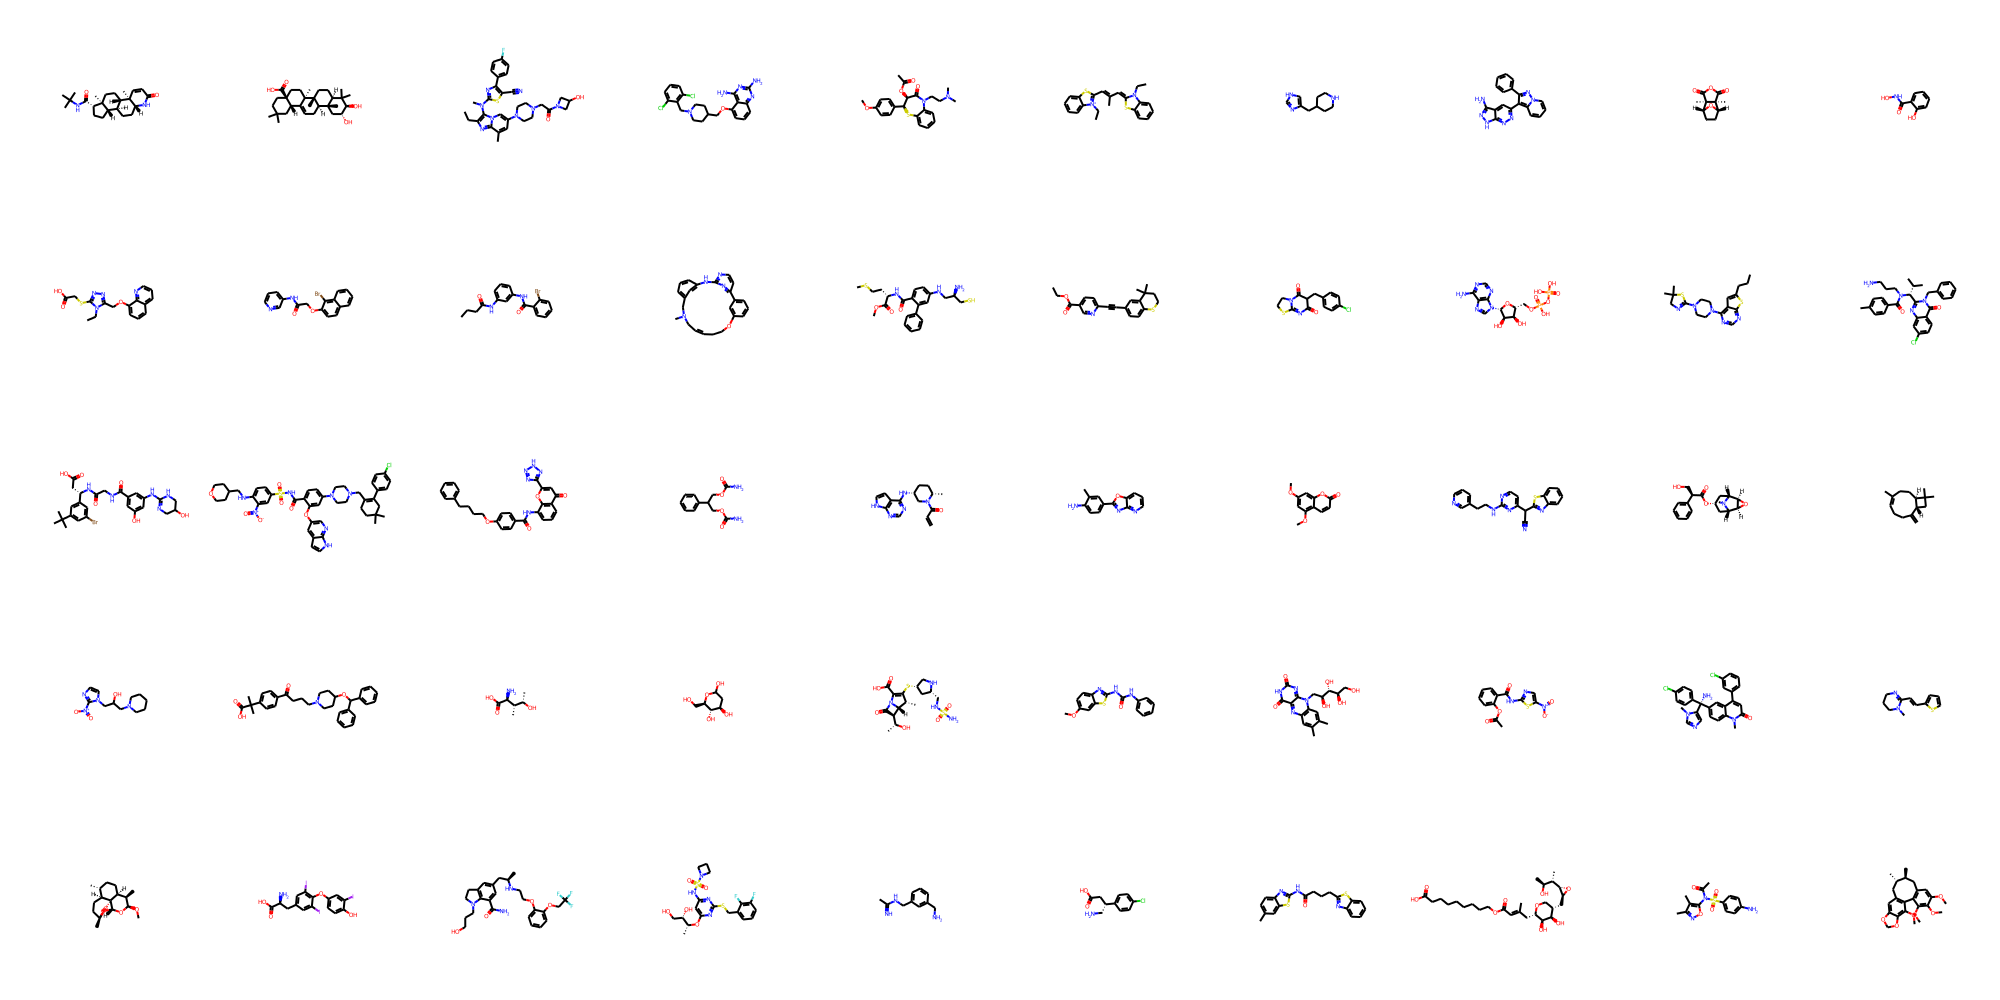

In [2271]:
smiles_list = [
'CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(=O)C=C[C@]4(C)[C@H]3CC[C@]12C',
'CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@@]5(C)C[C@@H](O)[C@H](O)C(C)(C)[C@@H]5CC[C@]43C)[C@@H]2C1',
'CCc1nc2c(C)cc(N3CCN(CC(=O)N4CC(O)C4)CC3)cn2c1N(C)c1nc(-c2ccc(F)cc2)c(C#N)s1',
'Nc1nc(N)c2c(OCC3CCN(Cc4c(Cl)cccc4Cl)CC3)cccc2n1',
'COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2OC(C)=O)cc1',
'CCN1/C(=C/C(C)=C/c2sc3ccccc3[n+]2CC)Sc2ccccc21',
'c1nc(CC2CCNCC2)c[nH]1',
'Nc1n[nH]c2nnc(-c3c(-c4ccccc4)nn4ccccc34)cc12',
'C[C@]12C(=O)OC(=O)[C@@]1(C)[C@@H]1CC[C@H]2O1',
'O=C(NO)c1ccccc1O',
'CCn1c(COc2cccc3cccnc23)nnc1SCC(=O)O',
'O=C(COc1ccc2ccccc2c1Br)Nc1cccnc1',
'CCCC(=O)Nc1cccc(NC(=O)c2ccccc2Br)c1',
'CN1C/C=C/CCOc2cccc(c2)-c2ccnc(n2)Nc2cccc(c2)C1',
'COC(=O)[C@H](CCSC)NC(=O)c1ccc(NC[C@@H](N)CS)cc1-c1ccccc1',
'CCOC(=O)c1ccc(C#Cc2ccc3c(c2)C(C)(C)CCS3)nc1',
'O=C1N=C2SCCN2C(=O)C1Cc1ccc(Cl)cc1',
'Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O)O)[C@@H](O)[C@H]1O',
'CCCc1cc2c(N3CCN(C4=NCC(C)(C)S4)CC3)ncnc2s1',
'Cc1ccc(C(=O)N(CCCN)[C@@H](c2nc3cc(Cl)ccc3c(=O)n2Cc2ccccc2)C(C)C)cc1',
'CC(C)(C)c1cc(Br)cc([C@H](CC(=O)O)NC(=O)CNC(=O)c2cc(O)cc(NC3=NCC(O)CN3)c2)c1',
'CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NCC5CCOCC5)c([N+](=O)[O-])c4)c(Oc4cnc5[nH]ccc5c4)c3)CC2)=C(c2ccc(Cl)cc2)C1',
'O=C(Nc1cccc2c(=O)cc(-c3nn[nH]n3)oc12)c1ccc(OCCCCc2ccccc2)cc1',
'NC(=O)OCC(COC(N)=O)c1ccccc1',
'C=CC(=O)N1C[C@H](Nc2ncnc3[nH]ccc23)CC[C@@H]1C',
'Cc1cc(-c2nc3ncccc3o2)ccc1N',
'COc1cc(OC)c2ccc(=O)oc2c1',
'N#CC(c1ccnc(NCCc2cccnc2)n1)c1nc2ccccc2s1',
'CN1[C@H]2C[C@H](OC(=O)[C@H](CO)c3ccccc3)C[C@@H]1[C@H]1O[C@@H]21',
'C=C1CC/C=C(\C)CC[C@@H]2[C@@H]1CC2(C)C',
'O=[N+]([O-])c1nccn1CC(O)CN1CCCCC1',
'CC(C)(C(=O)O)c1ccc(C(=O)CCCN2CCC(OC(c3ccccc3)c3ccccc3)CC2)cc1',
'C[C@H](O)[C@H](C)[C@H](N)C(=O)O',
'OC[C@H]1OC(O)C[C@@H](O)[C@@H]1O',
'C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[C@H](CNS(N)(=O)=O)C3)[C@H](C)[C@H]12',
'COc1ccc2nc(NC(=O)Nc3ccccc3)sc2c1',
'Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(C[C@H](O)[C@H](O)[C@H](O)CO)c2cc1C',
'CC(=O)Oc1ccccc1C(=O)Nc1ncc([N+](=O)[O-])s1',
'Cn1cncc1[C@@](N)(c1ccc(Cl)cc1)c1ccc2c(c1)c(-c1cccc(Cl)c1)cc(=O)n2C',
'CN1CCCN=C1/C=C/c1cccs1',
'CO[C@H]1O[C@@H]2O[C@@]3(C)CC[C@H]4[C@H](C)CC[C@@H]([C@H]1C)[C@]42OO3',
'N[C@@H](Cc1cc(I)c(Oc2ccc(O)c(I)c2)c(I)c1)C(=O)O',
'C[C@H](Cc1cc2c(c(C(N)=O)c1)N(CCCO)CC2)NCCOc1ccccc1OCC(F)(F)F',
'C[C@@H](Oc1cc(NS(=O)(=O)N2CCC2)nc(SCc2cccc(F)c2F)n1)[C@@H](O)CO',
'CC(=N)NCc1cccc(CN)c1',
'NC[C@H](CC(=O)O)c1ccc(Cl)cc1',
'Cc1ccc2nc(NC(=O)CCCc3nc4ccccc4s3)sc2c1',
'C/C(=C\C(=O)OCCCCCCCCC(=O)O)C[C@@H]1OC[C@H](C[C@@H]2O[C@H]2[C@@H](C)[C@H](C)O)[C@@H](O)[C@H]1O',
'CC(=O)N(c1onc(C)c1C)S(=O)(=O)c1ccc(N)cc1',
'COc1cc2c(c(OC)c1OC)-c1c(cc3c(c1OC)OCO3)C[C@H](C)[C@@H](C)C2',


]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



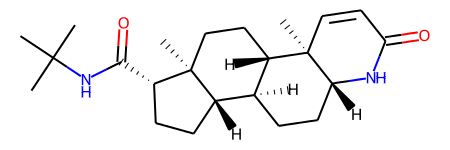

In [2272]:
M1 = mol_list [0]
M1

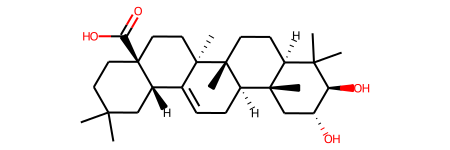

In [2273]:
M2 = mol_list [1]
M2

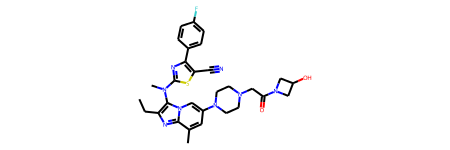

In [2274]:
M3 = mol_list [2]
M3

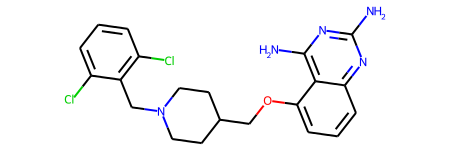

In [2275]:
M4 = mol_list [3]
M4

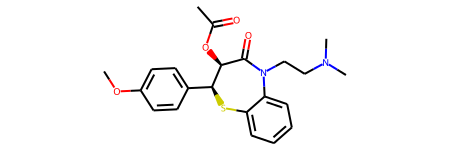

In [2276]:
M5 = mol_list [4]
M5

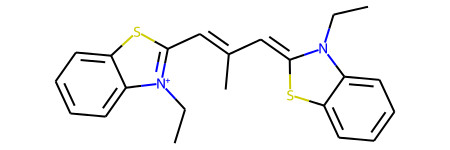

In [2277]:
M6 = mol_list [5]
M6

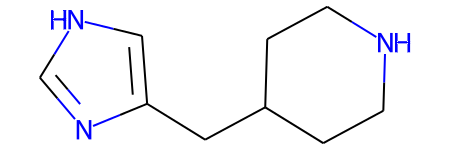

In [2278]:
M7 = mol_list [6]
M7

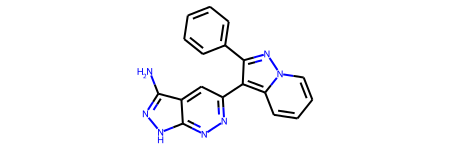

In [2279]:
M8 = mol_list [7]
M8

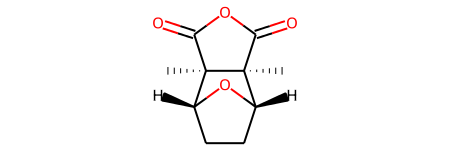

In [2280]:
M9 = mol_list [8]
M9

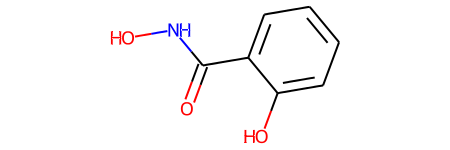

In [2281]:
M10= mol_list [9]
M10

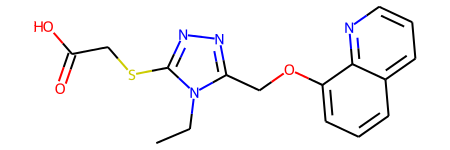

In [2282]:
M11= mol_list [10]
M11

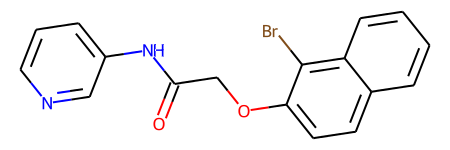

In [2283]:
M12= mol_list [11]
M12

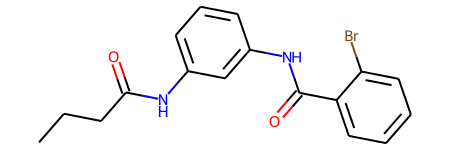

In [2284]:
M13= mol_list [12]
M13

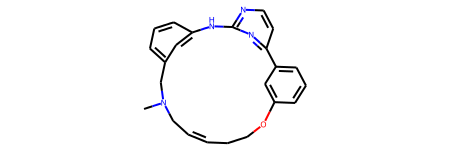

In [2285]:
M14= mol_list [13]
M14

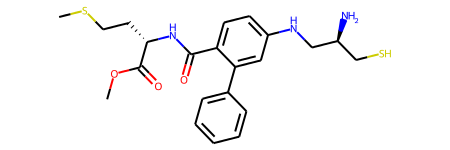

In [2286]:
M15= mol_list [14]
M15

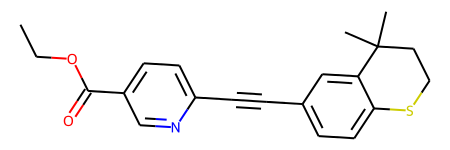

In [2287]:
M16= mol_list [15]
M16

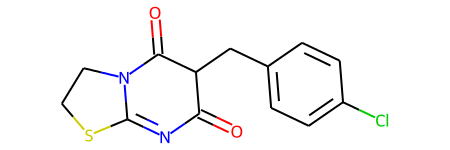

In [2288]:
M17= mol_list [16]
M17

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


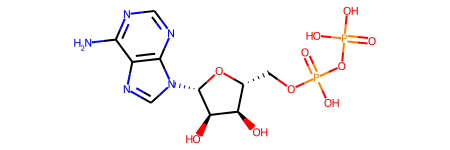

In [2289]:
M18= mol_list [17]
M18

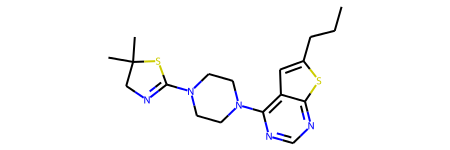

In [2290]:
M19= mol_list [18]
M19

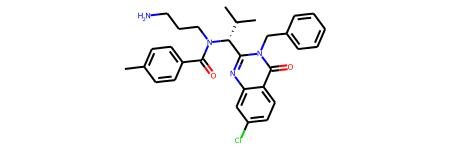

In [2291]:
M20= mol_list [19]
M20

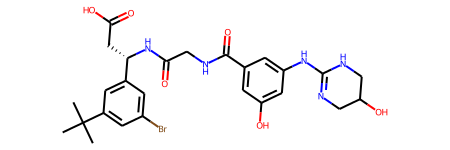

In [2292]:
M21= mol_list [20]
M21

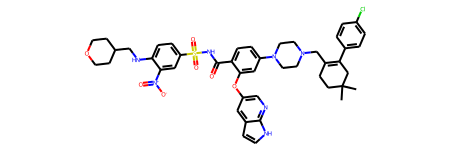

In [2293]:
M22= mol_list [21]
M22

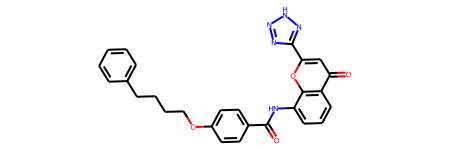

In [2294]:
M23= mol_list [22]
M23

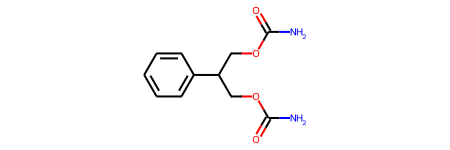

In [2295]:
M24= mol_list [23]
M24

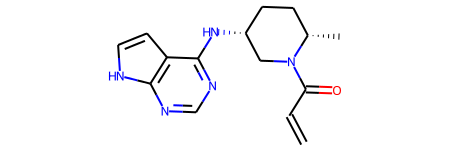

In [2296]:
M25= mol_list [24]
M25

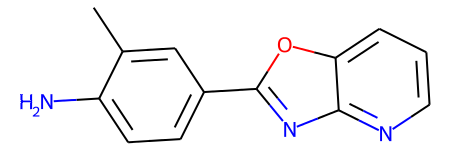

In [2297]:
M26= mol_list [25]
M26

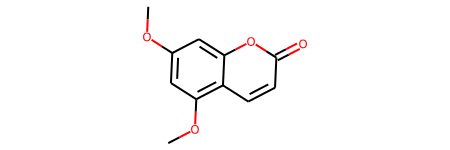

In [2298]:
M27= mol_list [26]
M27

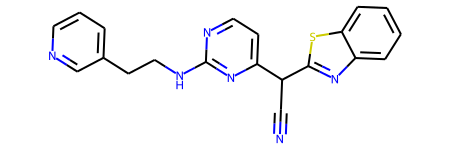

In [2299]:
M28= mol_list [27]
M28

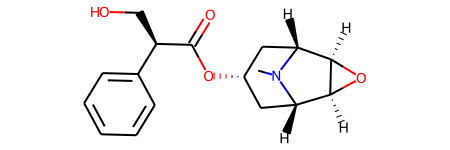

In [2300]:
M29= mol_list [28]
M29

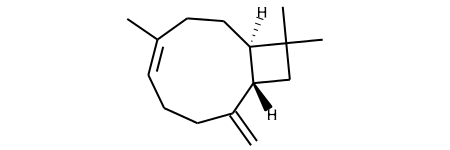

In [2301]:
M30= mol_list [29]
M30

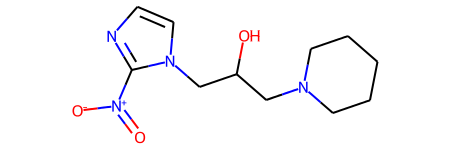

In [2302]:
M31= mol_list [30]
M31

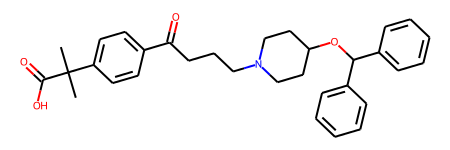

In [2303]:
M32= mol_list [31]
M32

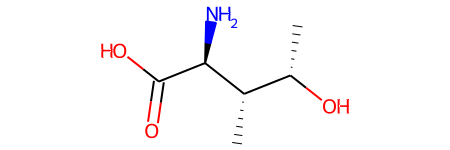

In [2304]:
M33= mol_list [32]
M33

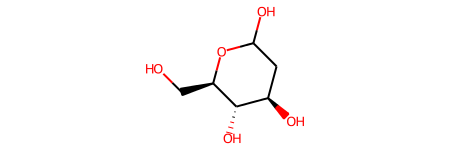

In [2305]:
M34= mol_list [33]
M34

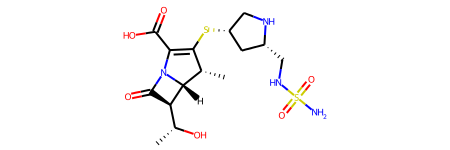

In [2306]:
M35= mol_list [34]
M35

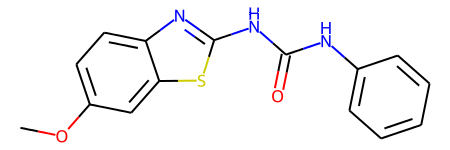

In [2307]:
M36= mol_list [35]
M36

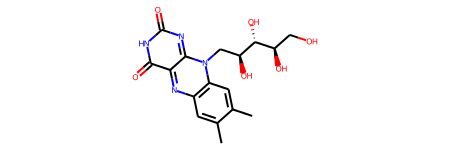

In [2308]:
M37= mol_list [36]
M37

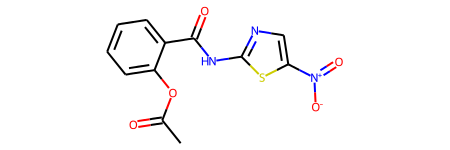

In [2309]:
M38= mol_list [37]
M38


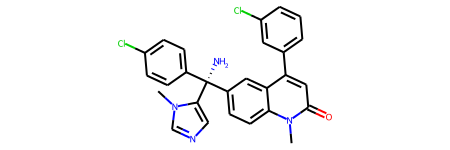

In [2310]:
M39= mol_list [38]
M39

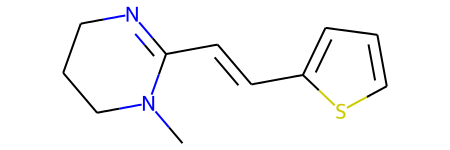

In [2311]:
M40= mol_list [39]
M40

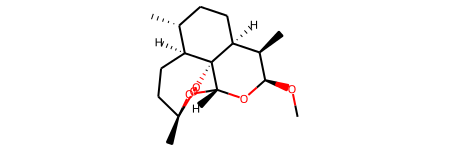

In [2312]:
M41= mol_list [40]
M41

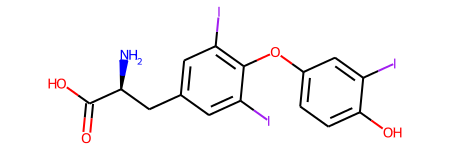

In [2313]:
M42= mol_list [41]
M42

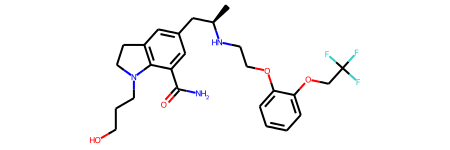

In [2314]:
M43= mol_list [42]
M43

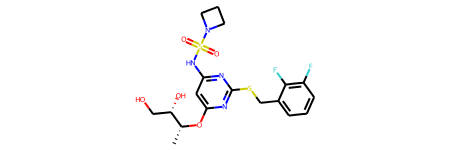

In [2315]:
M44= mol_list [43]
M44

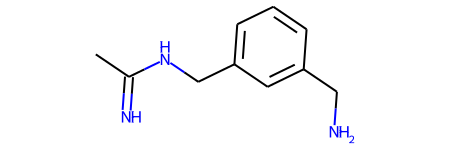

In [2316]:
M45= mol_list [44]
M45

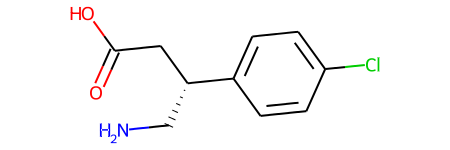

In [2317]:
M46= mol_list [45]
M46

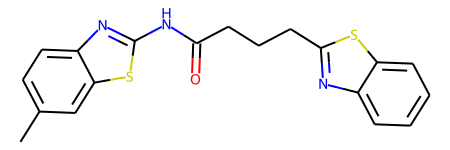

In [2318]:
M47= mol_list [46]
M47

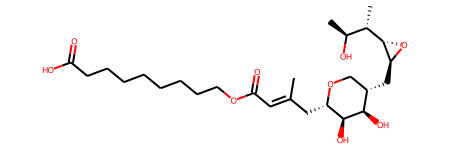

In [2319]:
M48= mol_list [47]
M48

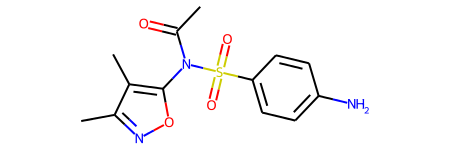

In [2320]:
M49= mol_list [48]
M49

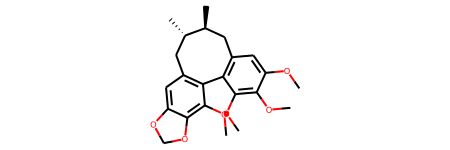

In [2321]:
M50= mol_list [49]
M50

In [2322]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[13,
 33,
 36,
 66,
 71,
 90,
 105,
 109,
 114,
 120,
 128,
 138,
 159,
 164,
 206,
 250,
 264,
 279,
 301,
 314,
 335,
 354,
 356,
 392,
 432,
 453,
 463,
 509,
 519,
 522,
 529,
 547,
 562,
 575,
 593,
 603,
 622,
 627,
 650,
 658,
 689,
 732,
 787,
 807,
 849,
 893,
 926,
 927,
 1019]

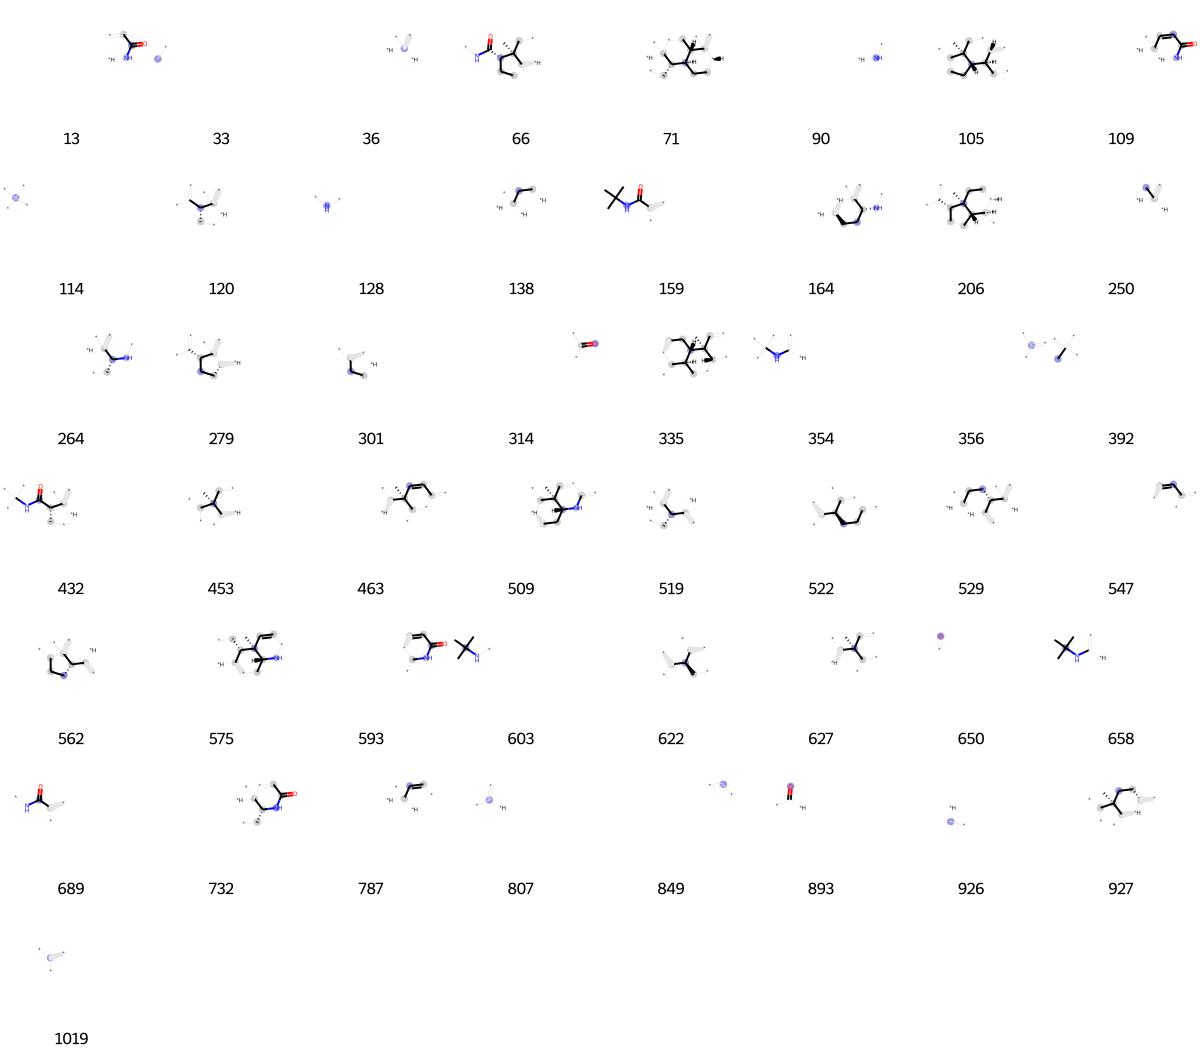

In [2323]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [2324]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[13,
 33,
 36,
 66,
 71,
 90,
 105,
 109,
 114,
 120,
 128,
 138,
 159,
 164,
 206,
 250,
 264,
 279,
 301,
 314,
 335,
 354,
 356,
 392,
 432,
 453,
 463,
 509,
 519,
 522,
 529,
 547,
 562,
 575,
 593,
 603,
 622,
 627,
 650,
 658,
 689,
 732,
 787,
 807,
 849,
 893,
 926,
 927,
 1019]

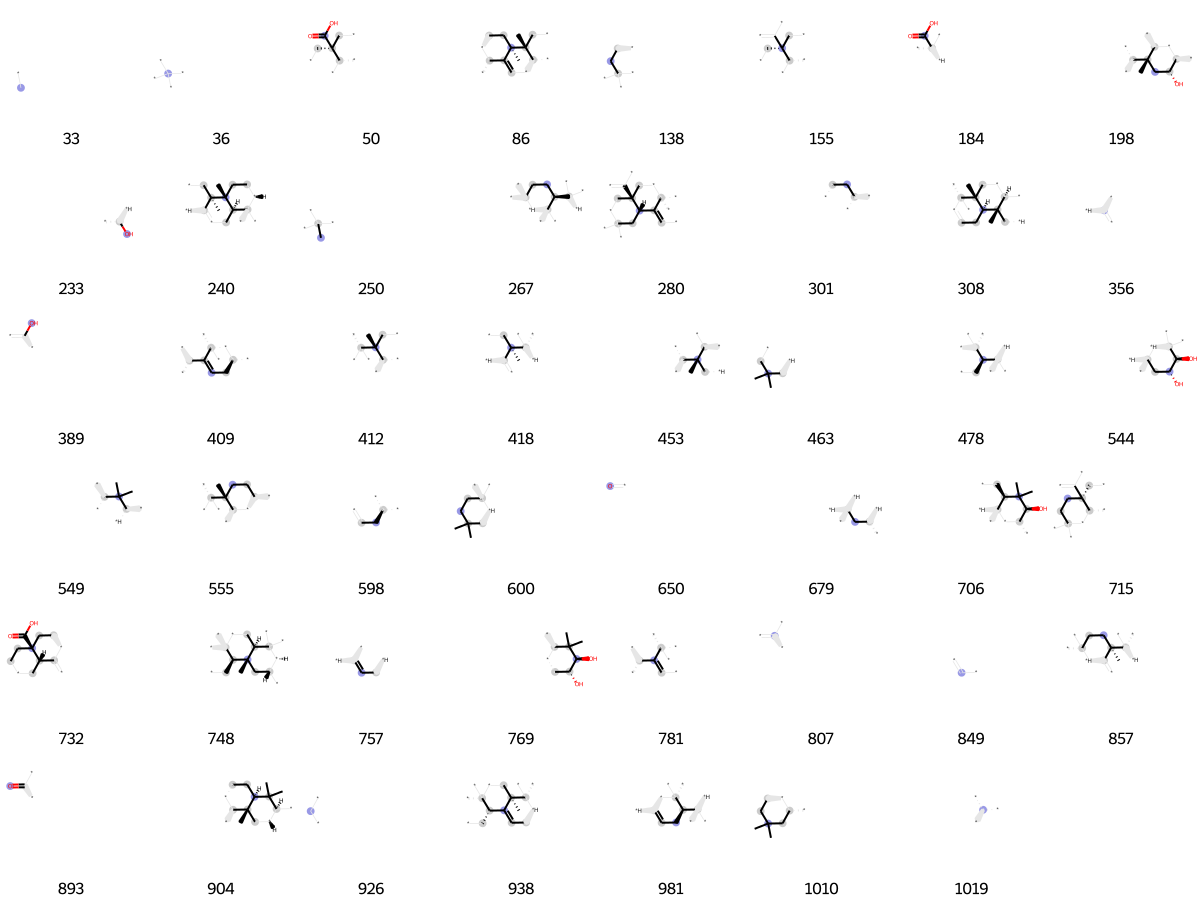

In [2325]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [2326]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[19,
 33,
 67,
 72,
 74,
 80,
 90,
 112,
 117,
 136,
 139,
 162,
 210,
 233,
 245,
 259,
 277,
 288,
 289,
 294,
 323,
 356,
 360,
 367,
 378,
 386,
 394,
 407,
 456,
 464,
 471,
 484,
 558,
 568,
 590,
 607,
 642,
 646,
 650,
 672,
 674,
 675,
 687,
 694,
 695,
 698,
 699,
 701,
 726,
 739,
 767,
 775,
 784,
 790,
 797,
 801,
 807,
 827,
 831,
 849,
 873,
 875,
 881,
 893,
 896,
 898,
 904,
 907,
 926,
 935,
 945,
 964,
 969,
 985,
 1009,
 1013,
 1019]

In [2327]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[15,
 29,
 64,
 73,
 80,
 112,
 147,
 216,
 237,
 246,
 289,
 301,
 335,
 356,
 366,
 378,
 386,
 409,
 425,
 428,
 433,
 435,
 456,
 497,
 536,
 554,
 561,
 659,
 695,
 726,
 741,
 767,
 784,
 800,
 831,
 849,
 859,
 904,
 919,
 926,
 935,
 937,
 946,
 960,
 974,
 990,
 1010,
 1011,
 1019]

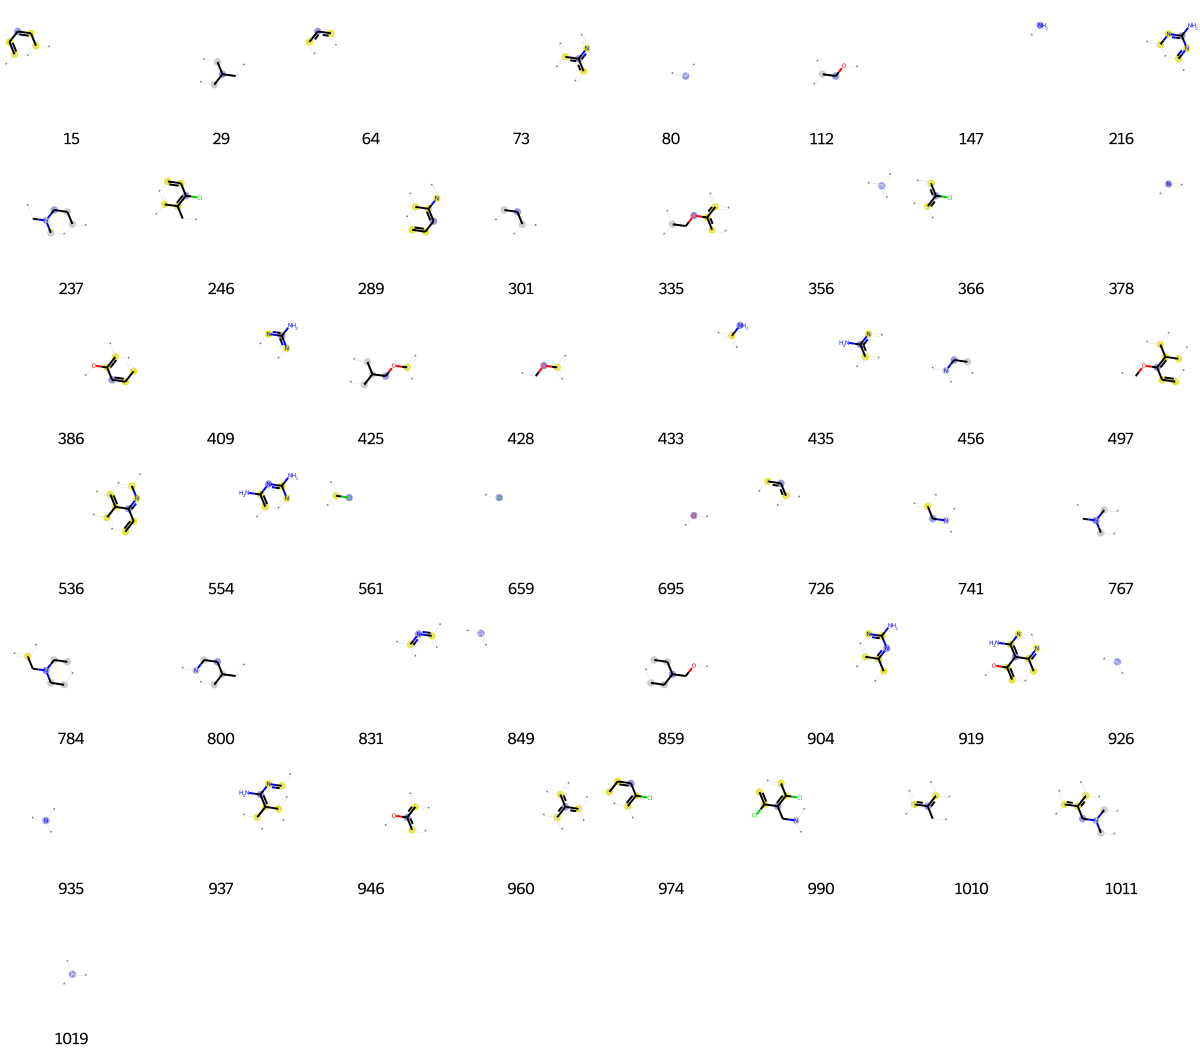

In [2328]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [2329]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[5,
 7,
 11,
 21,
 33,
 35,
 64,
 73,
 80,
 102,
 121,
 139,
 143,
 175,
 255,
 271,
 314,
 322,
 327,
 356,
 397,
 419,
 504,
 507,
 512,
 521,
 588,
 623,
 650,
 652,
 675,
 693,
 695,
 718,
 726,
 744,
 748,
 779,
 781,
 807,
 831,
 841,
 849,
 881,
 890,
 893,
 921,
 927,
 935,
 949,
 982,
 1017,
 1019]

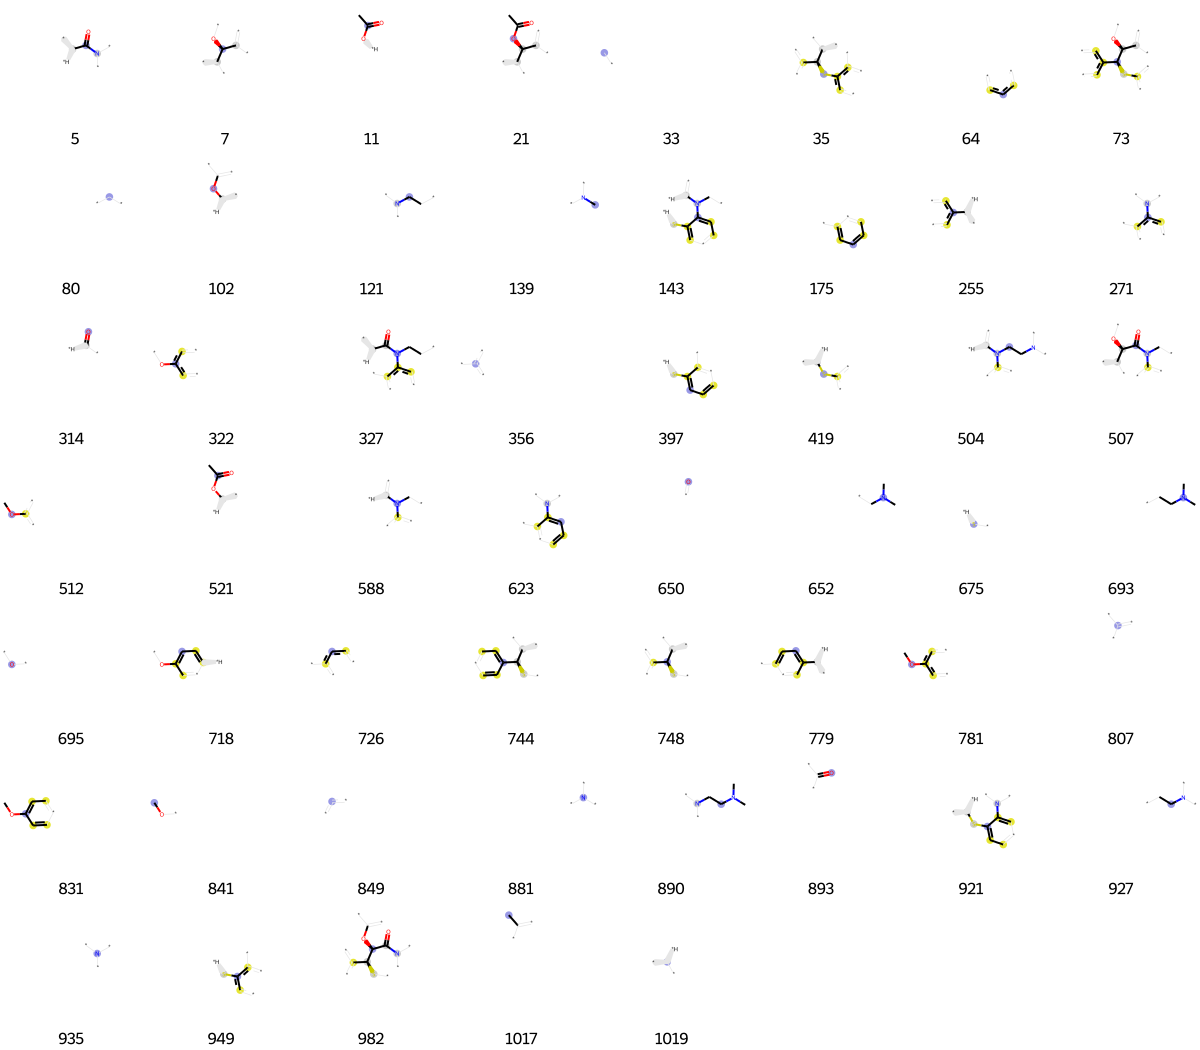

In [2330]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [2331]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[33,
 34,
 64,
 80,
 119,
 143,
 162,
 175,
 197,
 271,
 294,
 305,
 322,
 334,
 343,
 356,
 397,
 461,
 463,
 531,
 549,
 550,
 583,
 588,
 623,
 655,
 675,
 694,
 718,
 722,
 726,
 752,
 770,
 807,
 813,
 849,
 870,
 885,
 899,
 917,
 935,
 949,
 983,
 999,
 1010,
 1017,
 1020]

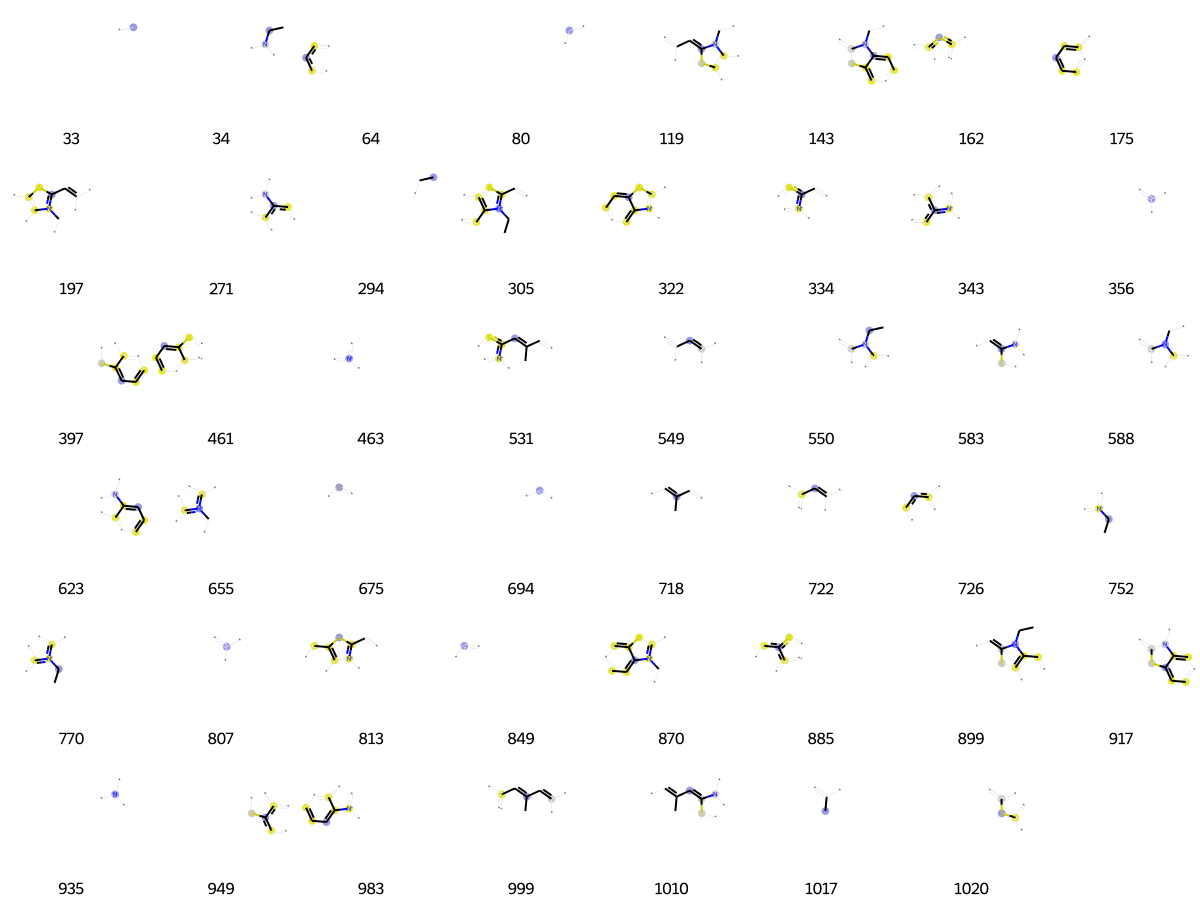

In [2332]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [2333]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[29,
 80,
 90,
 121,
 155,
 284,
 301,
 305,
 356,
 378,
 428,
 458,
 492,
 573,
 575,
 625,
 713,
 724,
 734,
 736,
 788,
 849,
 855,
 926,
 931,
 1014,
 1019]

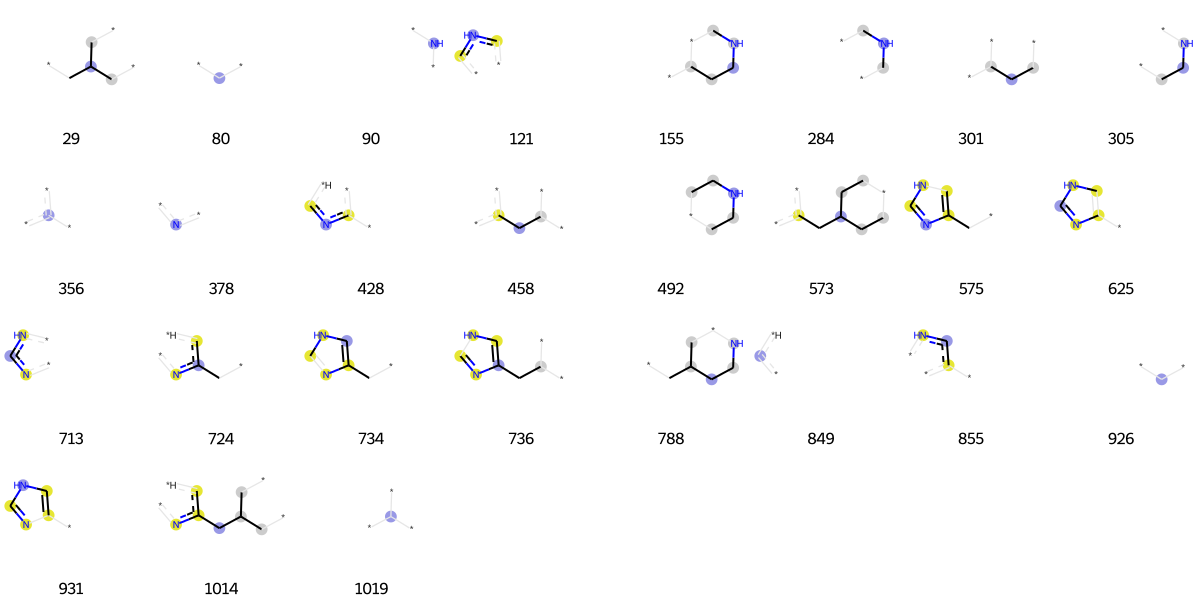

In [2334]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [2335]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[3,
 45,
 52,
 64,
 74,
 77,
 90,
 118,
 128,
 136,
 140,
 147,
 175,
 261,
 323,
 333,
 356,
 378,
 384,
 389,
 396,
 413,
 433,
 435,
 460,
 471,
 526,
 546,
 591,
 625,
 717,
 723,
 726,
 736,
 828,
 841,
 849,
 875,
 900,
 932,
 935,
 946,
 980]

In [2336]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 36,
 65,
 111,
 157,
 250,
 274,
 301,
 314,
 356,
 465,
 650,
 656,
 696,
 706,
 723,
 767,
 786,
 897,
 926,
 1019]

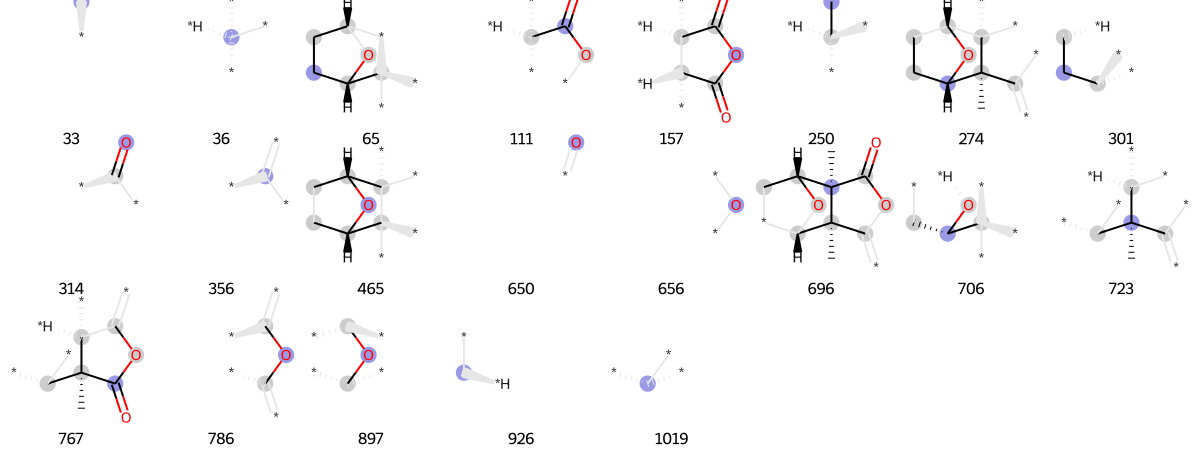

In [2337]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [2338]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[64,
 128,
 175,
 187,
 240,
 356,
 423,
 473,
 486,
 578,
 583,
 607,
 650,
 726,
 807,
 849,
 878,
 893,
 967,
 989]

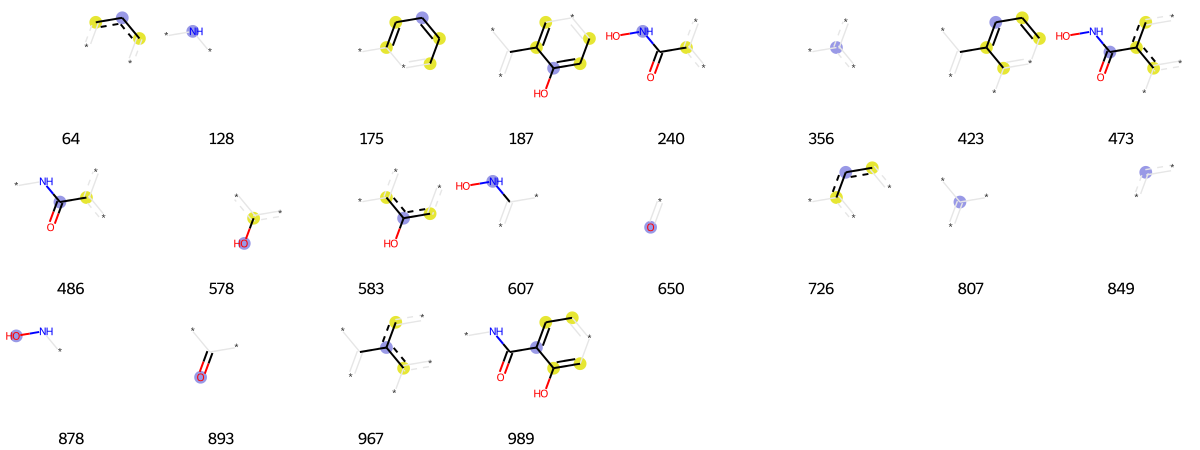

In [2339]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [2340]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[15,
 19,
 33,
 34,
 63,
 64,
 80,
 97,
 116,
 140,
 202,
 229,
 294,
 318,
 341,
 356,
 378,
 384,
 386,
 389,
 396,
 425,
 428,
 448,
 449,
 591,
 635,
 650,
 695,
 700,
 713,
 726,
 745,
 747,
 802,
 807,
 829,
 831,
 834,
 842,
 849,
 850,
 893,
 915,
 935,
 946,
 1011,
 1016]

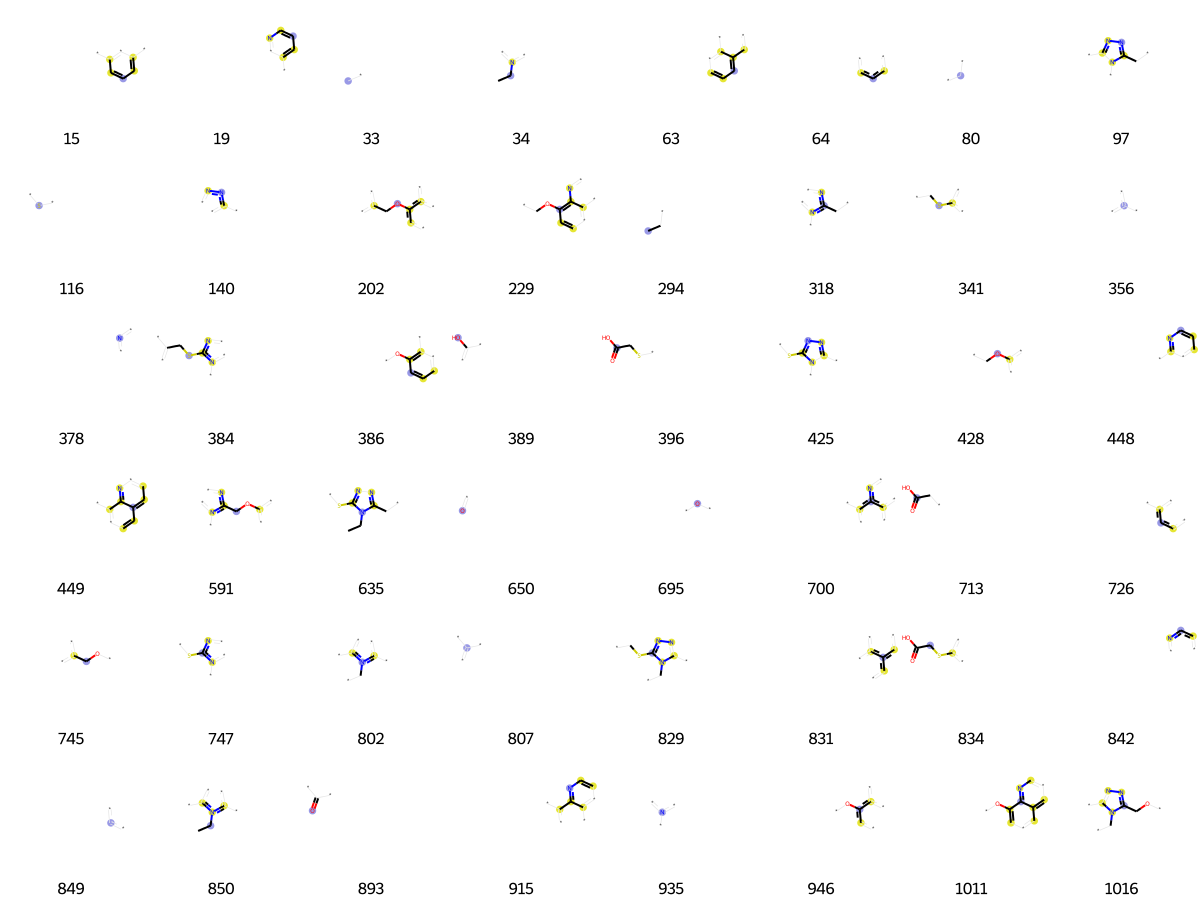

In [2341]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [2342]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[19,
 40,
 41,
 59,
 63,
 64,
 80,
 94,
 128,
 163,
 167,
 175,
 191,
 192,
 203,
 333,
 356,
 378,
 428,
 434,
 437,
 506,
 511,
 549,
 562,
 579,
 607,
 650,
 695,
 703,
 726,
 728,
 792,
 807,
 831,
 842,
 849,
 860,
 893,
 901,
 923,
 946,
 980]

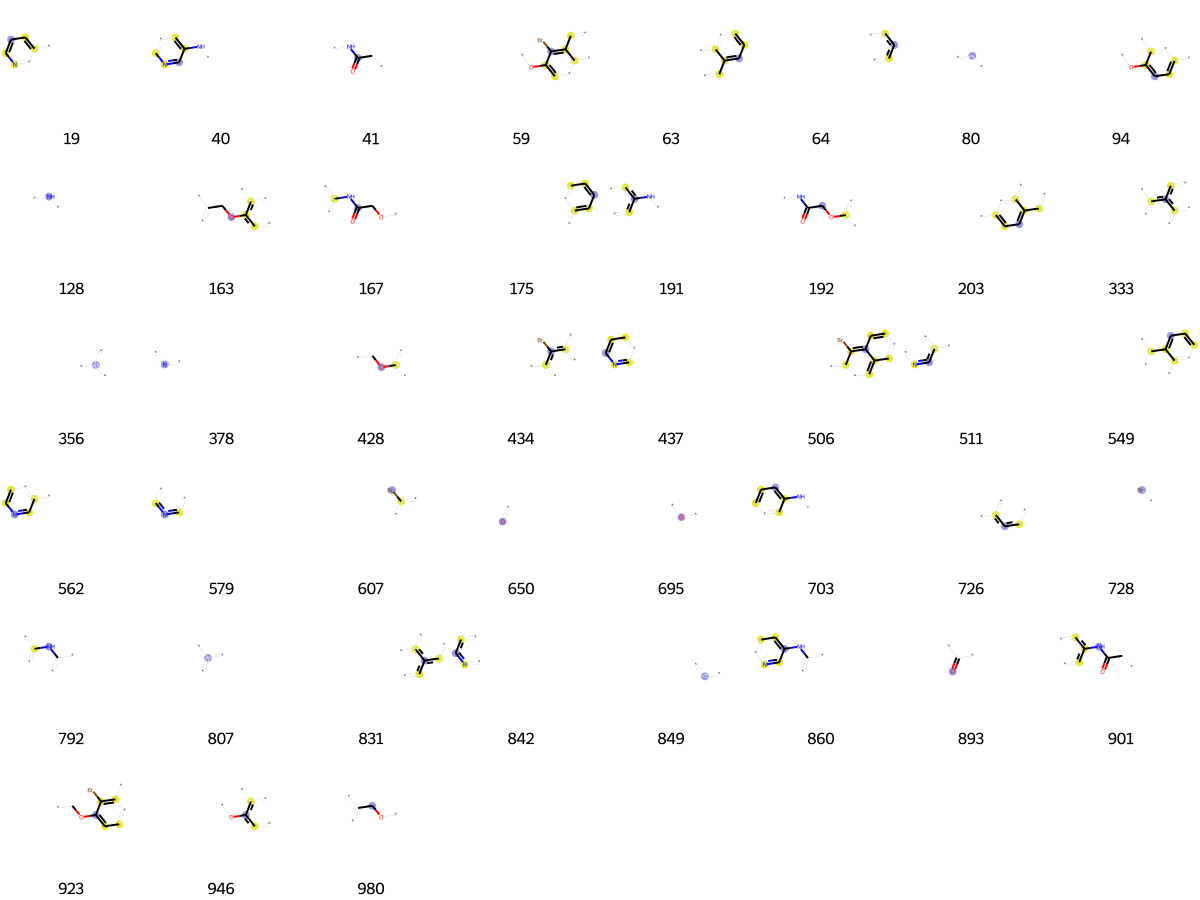

In [2343]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [2344]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 33,
 41,
 57,
 64,
 80,
 128,
 175,
 184,
 191,
 294,
 333,
 356,
 358,
 423,
 486,
 540,
 607,
 608,
 650,
 703,
 723,
 726,
 728,
 742,
 792,
 794,
 807,
 833,
 847,
 849,
 875,
 893,
 899,
 901,
 954,
 967]

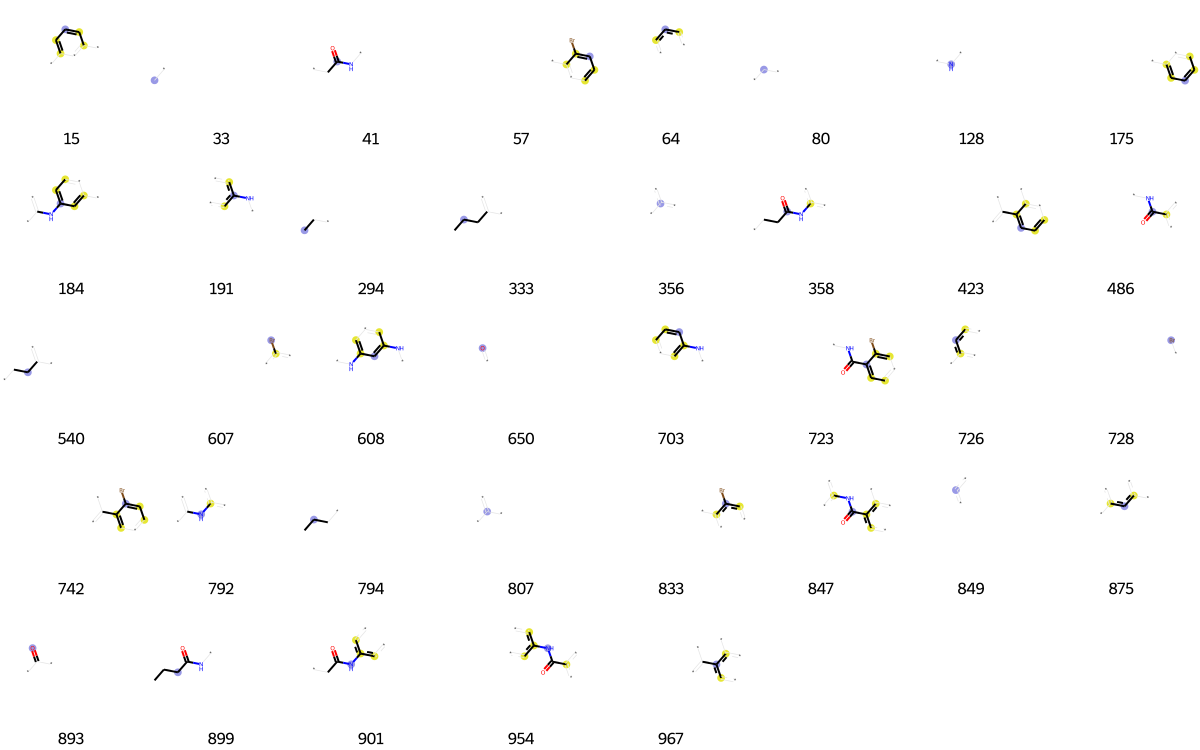

In [2345]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [2346]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[12,
 15,
 33,
 36,
 61,
 64,
 77,
 89,
 90,
 104,
 121,
 123,
 136,
 149,
 193,
 194,
 207,
 309,
 326,
 356,
 378,
 395,
 428,
 435,
 441,
 442,
 464,
 550,
 570,
 582,
 594,
 620,
 632,
 650,
 656,
 661,
 693,
 726,
 736,
 787,
 802,
 806,
 816,
 831,
 842,
 849,
 875,
 884,
 922,
 926,
 935,
 950,
 955,
 980,
 1012]

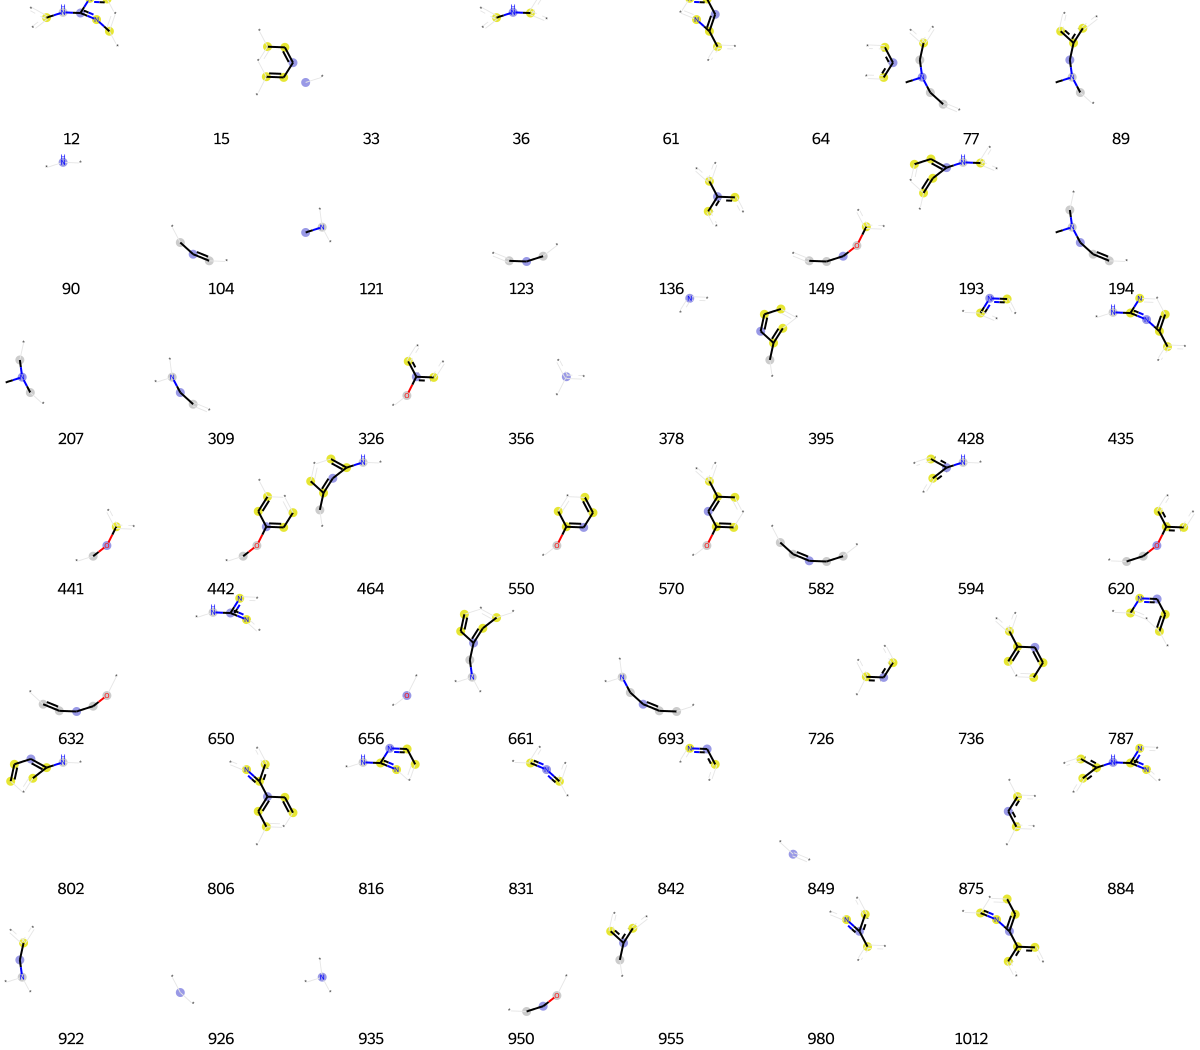

In [2347]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [2348]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[0,
 1,
 11,
 33,
 46,
 54,
 64,
 67,
 80,
 82,
 116,
 117,
 128,
 136,
 138,
 147,
 158,
 159,
 175,
 181,
 191,
 222,
 229,
 321,
 339,
 352,
 356,
 389,
 392,
 394,
 411,
 435,
 486,
 518,
 534,
 594,
 606,
 650,
 695,
 726,
 736,
 739,
 773,
 786,
 796,
 807,
 818,
 841,
 843,
 849,
 875,
 893,
 918,
 948,
 967]

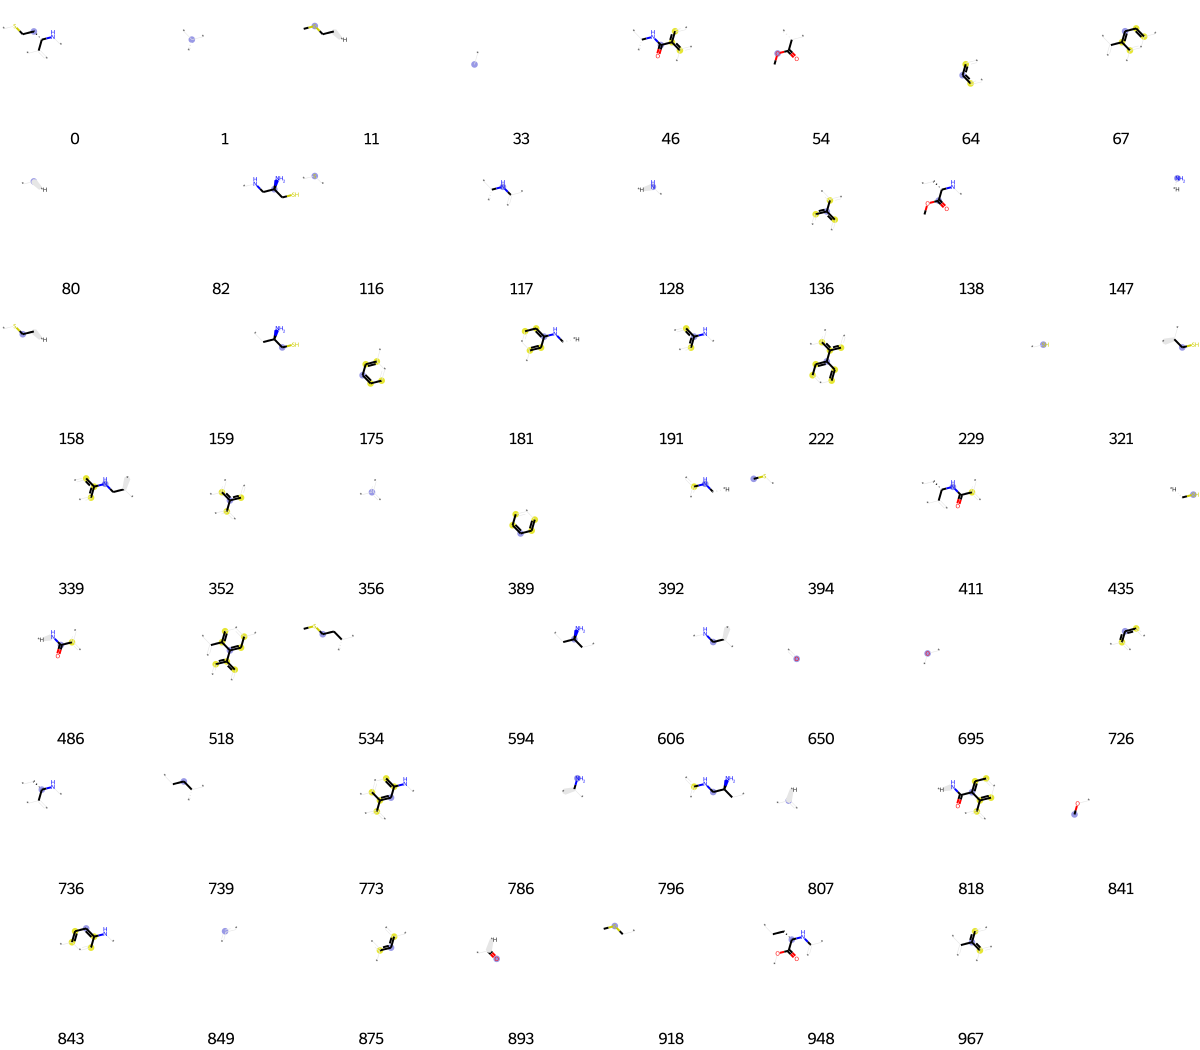

In [2349]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [2350]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[33,
 36,
 50,
 80,
 102,
 138,
 145,
 147,
 157,
 189,
 214,
 249,
 250,
 294,
 330,
 353,
 356,
 361,
 378,
 428,
 430,
 498,
 511,
 513,
 560,
 650,
 657,
 673,
 674,
 675,
 677,
 695,
 698,
 711,
 726,
 744,
 759,
 789,
 798,
 807,
 849,
 875,
 881,
 893,
 926,
 930,
 949,
 953,
 956,
 975,
 990]

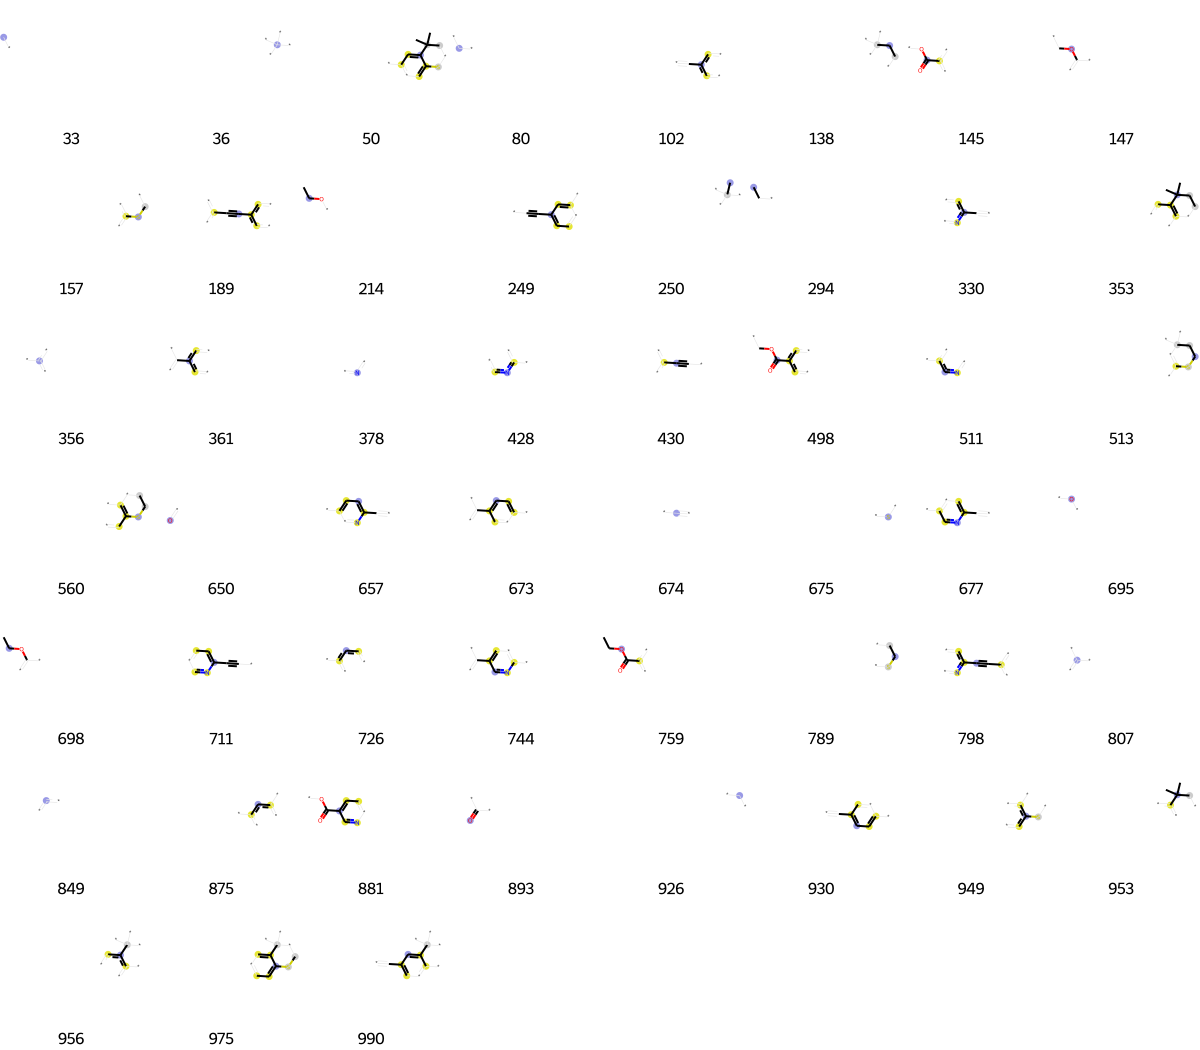

In [2351]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [2352]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[5,
 46,
 80,
 157,
 216,
 280,
 290,
 301,
 310,
 314,
 356,
 378,
 395,
 408,
 425,
 432,
 433,
 437,
 456,
 458,
 474,
 540,
 561,
 640,
 650,
 659,
 675,
 726,
 730,
 789,
 816,
 849,
 890,
 892,
 893,
 926,
 927,
 935,
 1019]

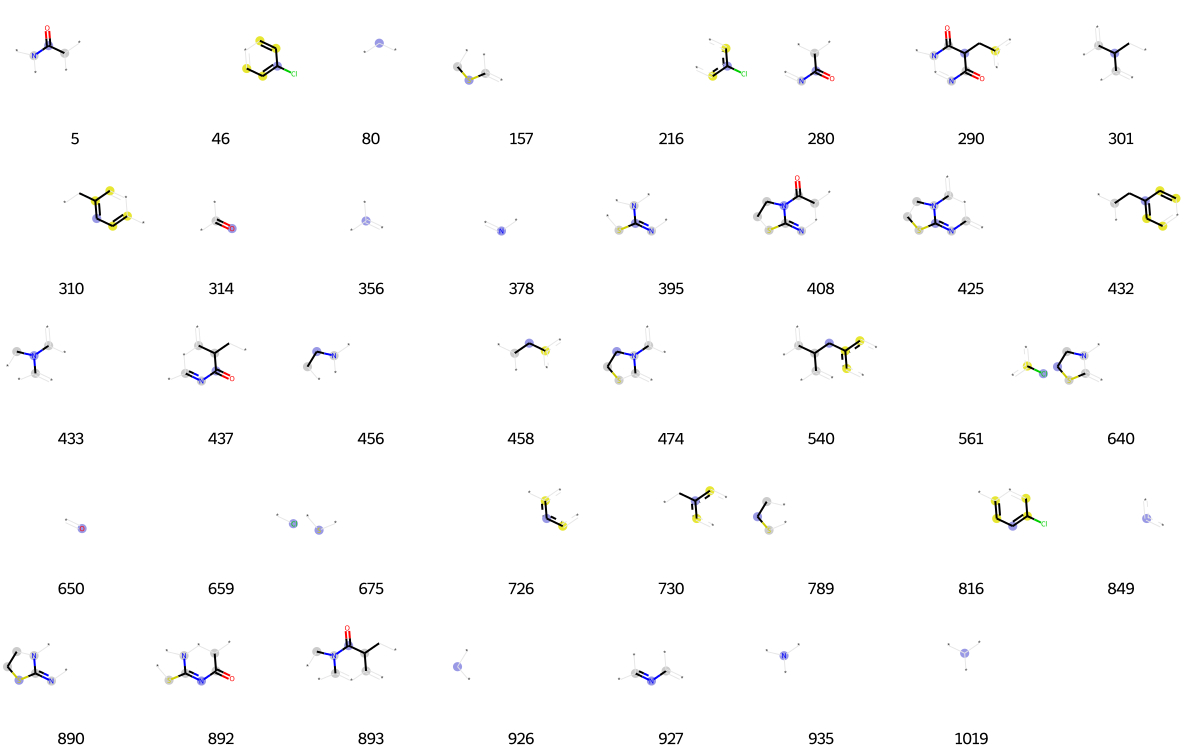

In [2353]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [2354]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[9,
 52,
 71,
 75,
 80,
 112,
 147,
 152,
 192,
 194,
 209,
 229,
 233,
 356,
 378,
 386,
 428,
 433,
 435,
 454,
 463,
 486,
 489,
 519,
 548,
 577,
 610,
 650,
 656,
 672,
 692,
 695,
 700,
 708,
 786,
 795,
 807,
 814,
 820,
 849,
 854,
 863,
 897,
 932,
 935,
 962,
 980,
 995,
 1019,
 1020]

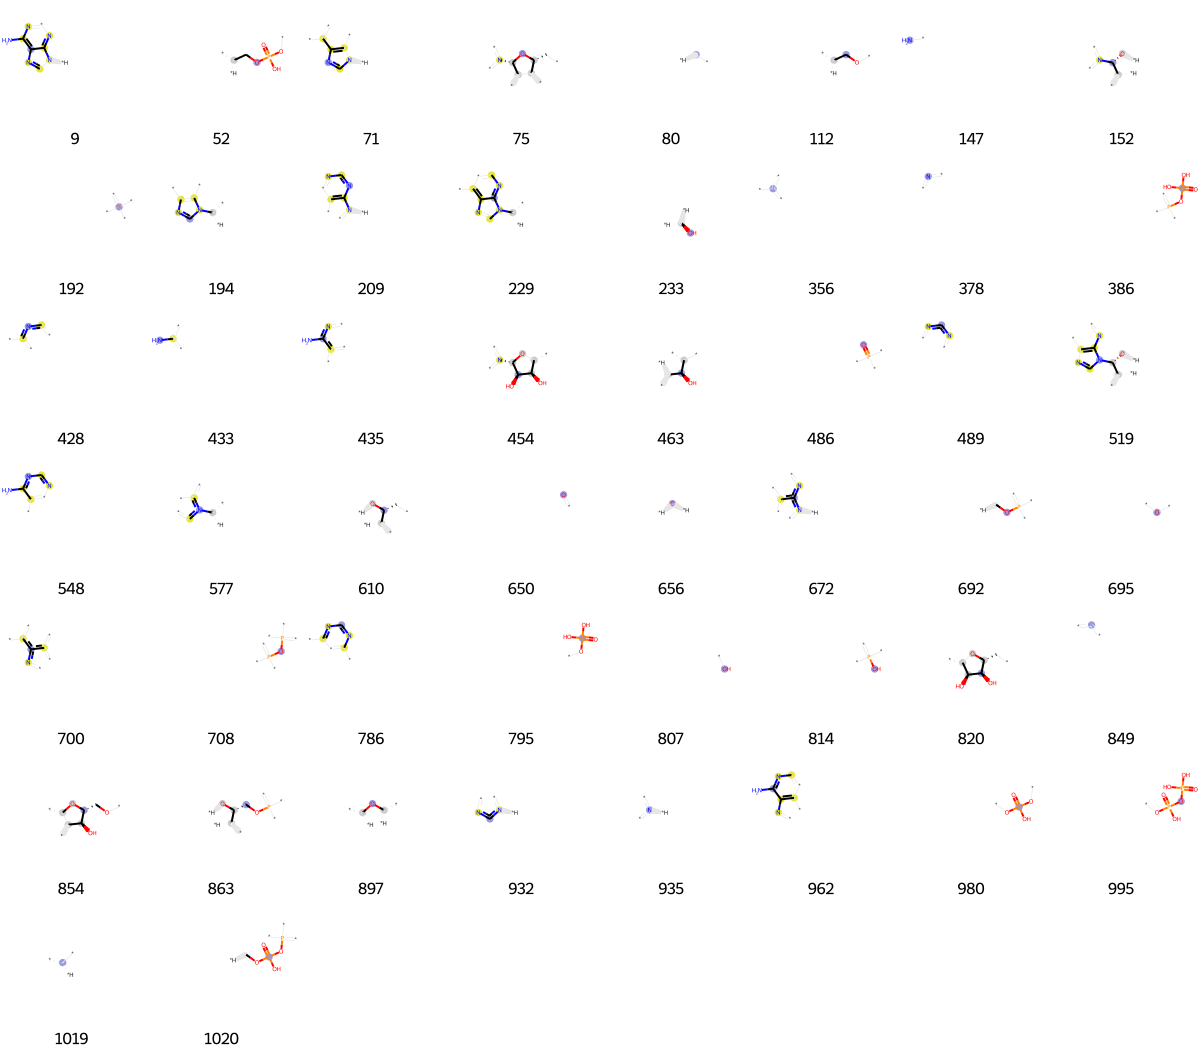

In [2355]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [2356]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[29,
 33,
 36,
 80,
 119,
 130,
 149,
 162,
 219,
 250,
 294,
 303,
 333,
 356,
 378,
 395,
 407,
 428,
 448,
 456,
 484,
 489,
 493,
 511,
 528,
 583,
 595,
 620,
 655,
 656,
 675,
 697,
 702,
 754,
 759,
 760,
 786,
 794,
 849,
 875,
 881,
 926,
 935,
 939,
 961,
 978,
 985]

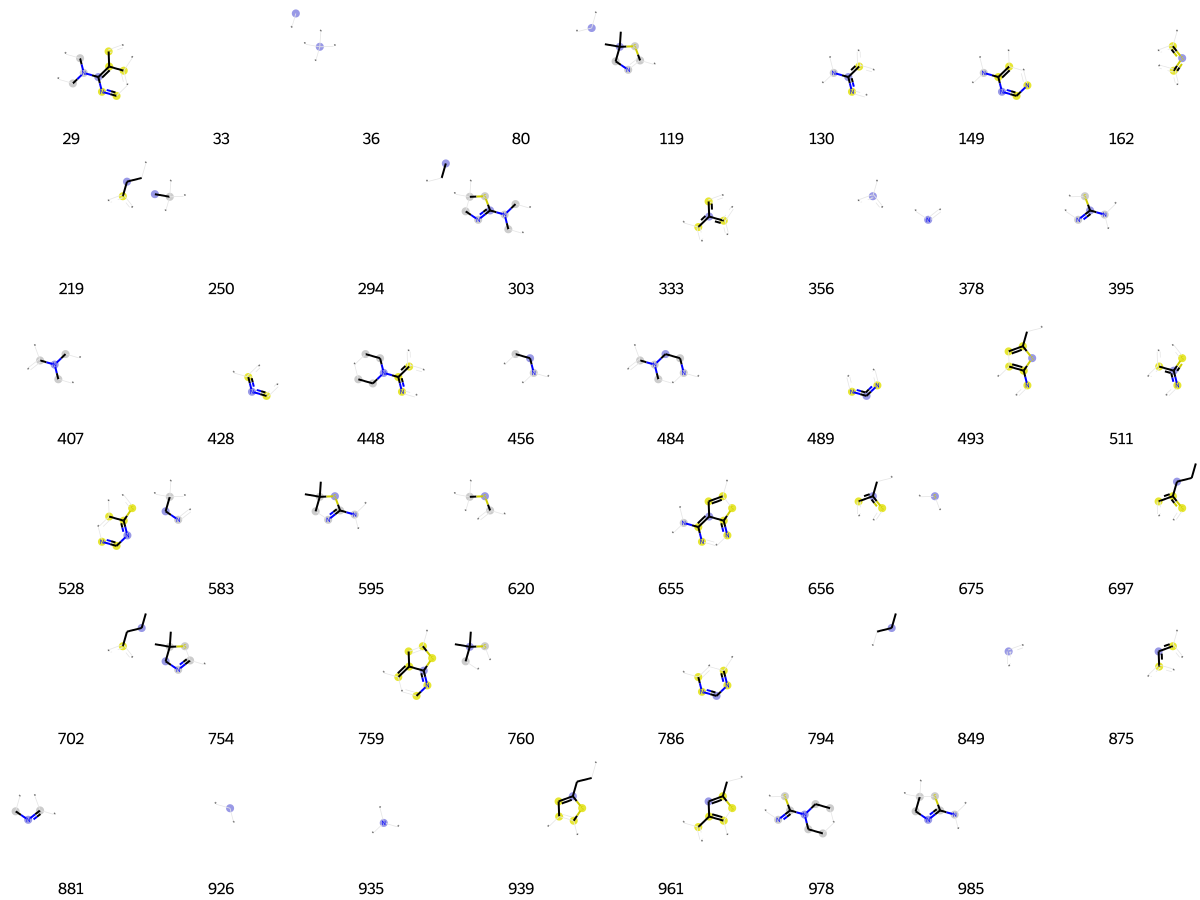

In [2357]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [2358]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 33,
 42,
 64,
 73,
 80,
 82,
 83,
 107,
 111,
 122,
 147,
 151,
 165,
 175,
 197,
 216,
 232,
 235,
 252,
 283,
 314,
 333,
 334,
 335,
 356,
 361,
 378,
 389,
 478,
 482,
 493,
 504,
 556,
 561,
 587,
 608,
 650,
 659,
 672,
 673,
 698,
 709,
 726,
 730,
 741,
 749,
 799,
 802,
 807,
 816,
 831,
 837,
 849,
 875,
 881,
 887,
 893,
 896,
 927,
 935,
 981]

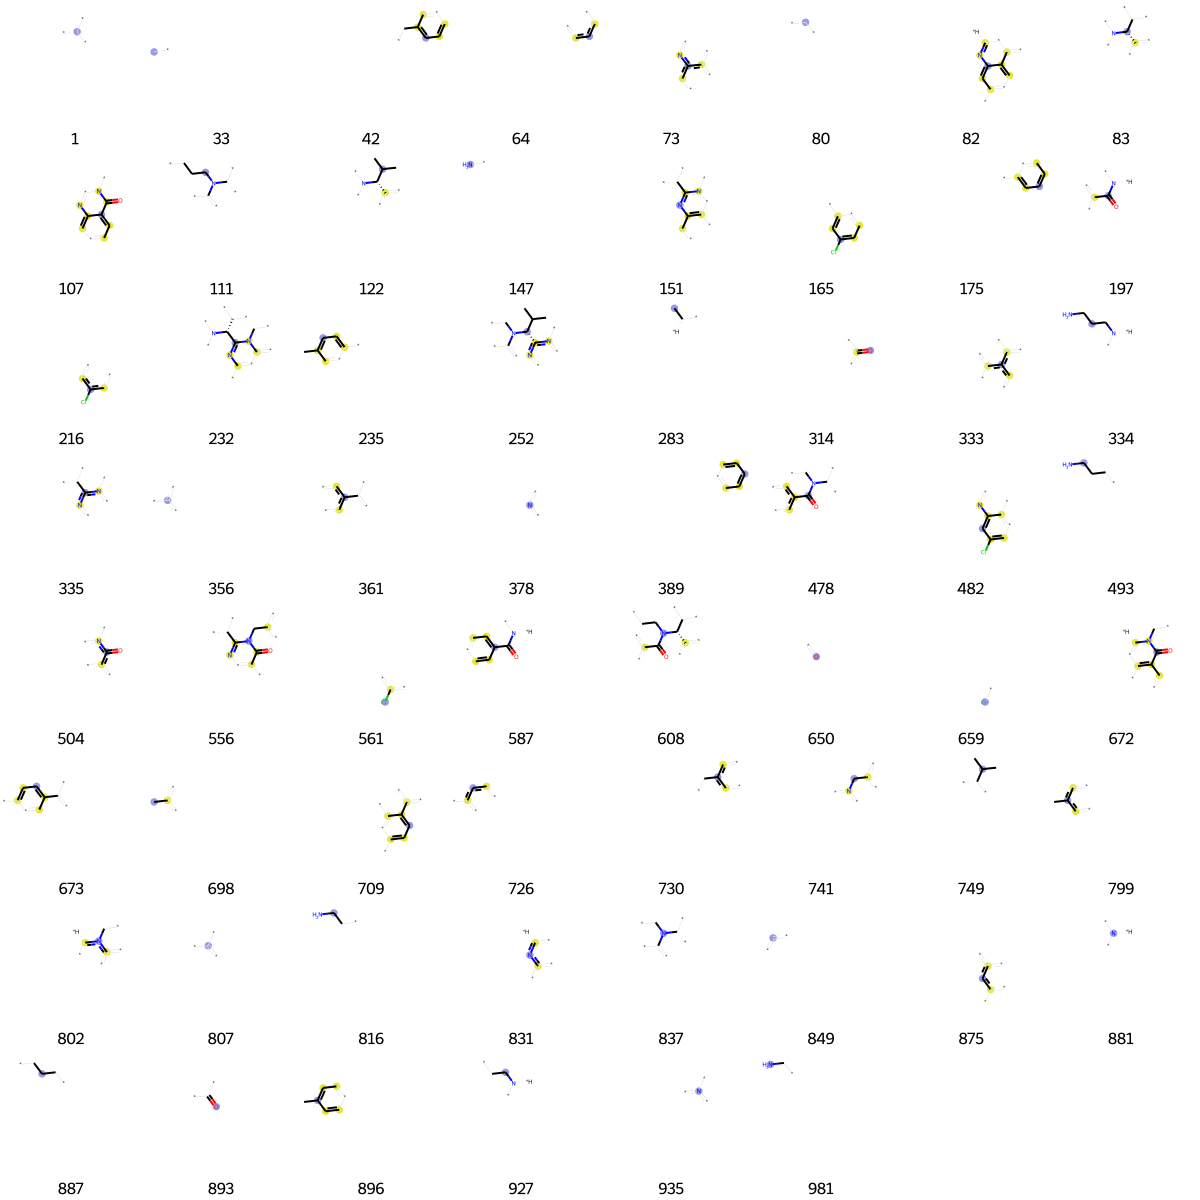

In [2359]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [2360]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 15,
 33,
 41,
 63,
 80,
 90,
 114,
 117,
 128,
 167,
 191,
 197,
 233,
 246,
 256,
 261,
 262,
 265,
 266,
 272,
 291,
 315,
 341,
 356,
 361,
 371,
 378,
 389,
 392,
 393,
 416,
 470,
 480,
 485,
 486,
 491,
 508,
 520,
 524,
 539,
 542,
 578,
 590,
 607,
 630,
 650,
 691,
 713,
 714,
 728,
 729,
 741,
 745,
 749,
 752,
 757,
 807,
 842,
 849,
 858,
 875,
 881,
 893,
 908,
 909,
 926,
 1019]

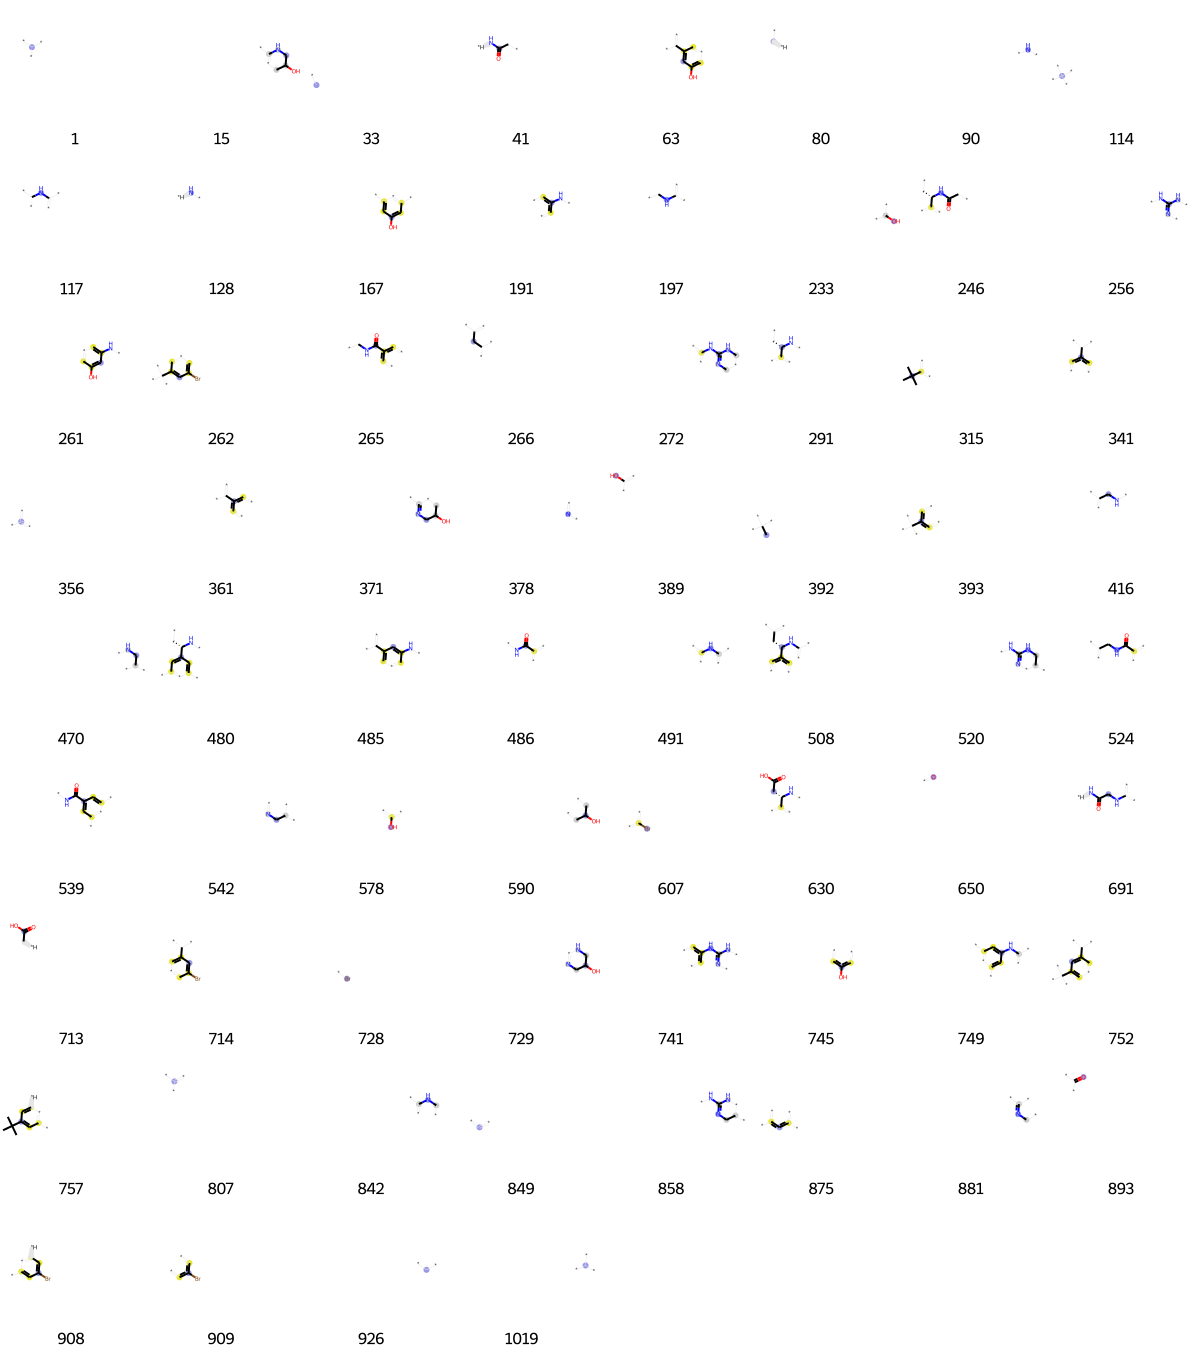

In [2361]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [2362]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[7,
 29,
 33,
 36,
 45,
 46,
 67,
 74,
 80,
 84,
 90,
 91,
 92,
 128,
 136,
 138,
 171,
 180,
 198,
 200,
 216,
 233,
 240,
 250,
 278,
 285,
 295,
 301,
 307,
 319,
 322,
 331,
 333,
 350,
 354,
 356,
 376,
 378,
 381,
 392,
 407,
 428,
 452,
 456,
 458,
 463,
 479,
 482,
 484,
 486,
 491,
 496,
 502,
 503,
 511,
 523,
 542,
 552,
 561,
 580,
 593,
 609,
 650,
 656,
 659,
 687,
 690,
 695,
 711,
 714,
 715,
 716,
 726,
 741,
 753,
 767,
 784,
 801,
 806,
 807,
 816,
 831,
 832,
 835,
 838,
 842,
 845,
 849,
 872,
 875,
 893,
 896,
 926,
 935,
 939,
 940,
 946,
 949,
 950,
 956,
 960,
 967,
 977,
 1019]

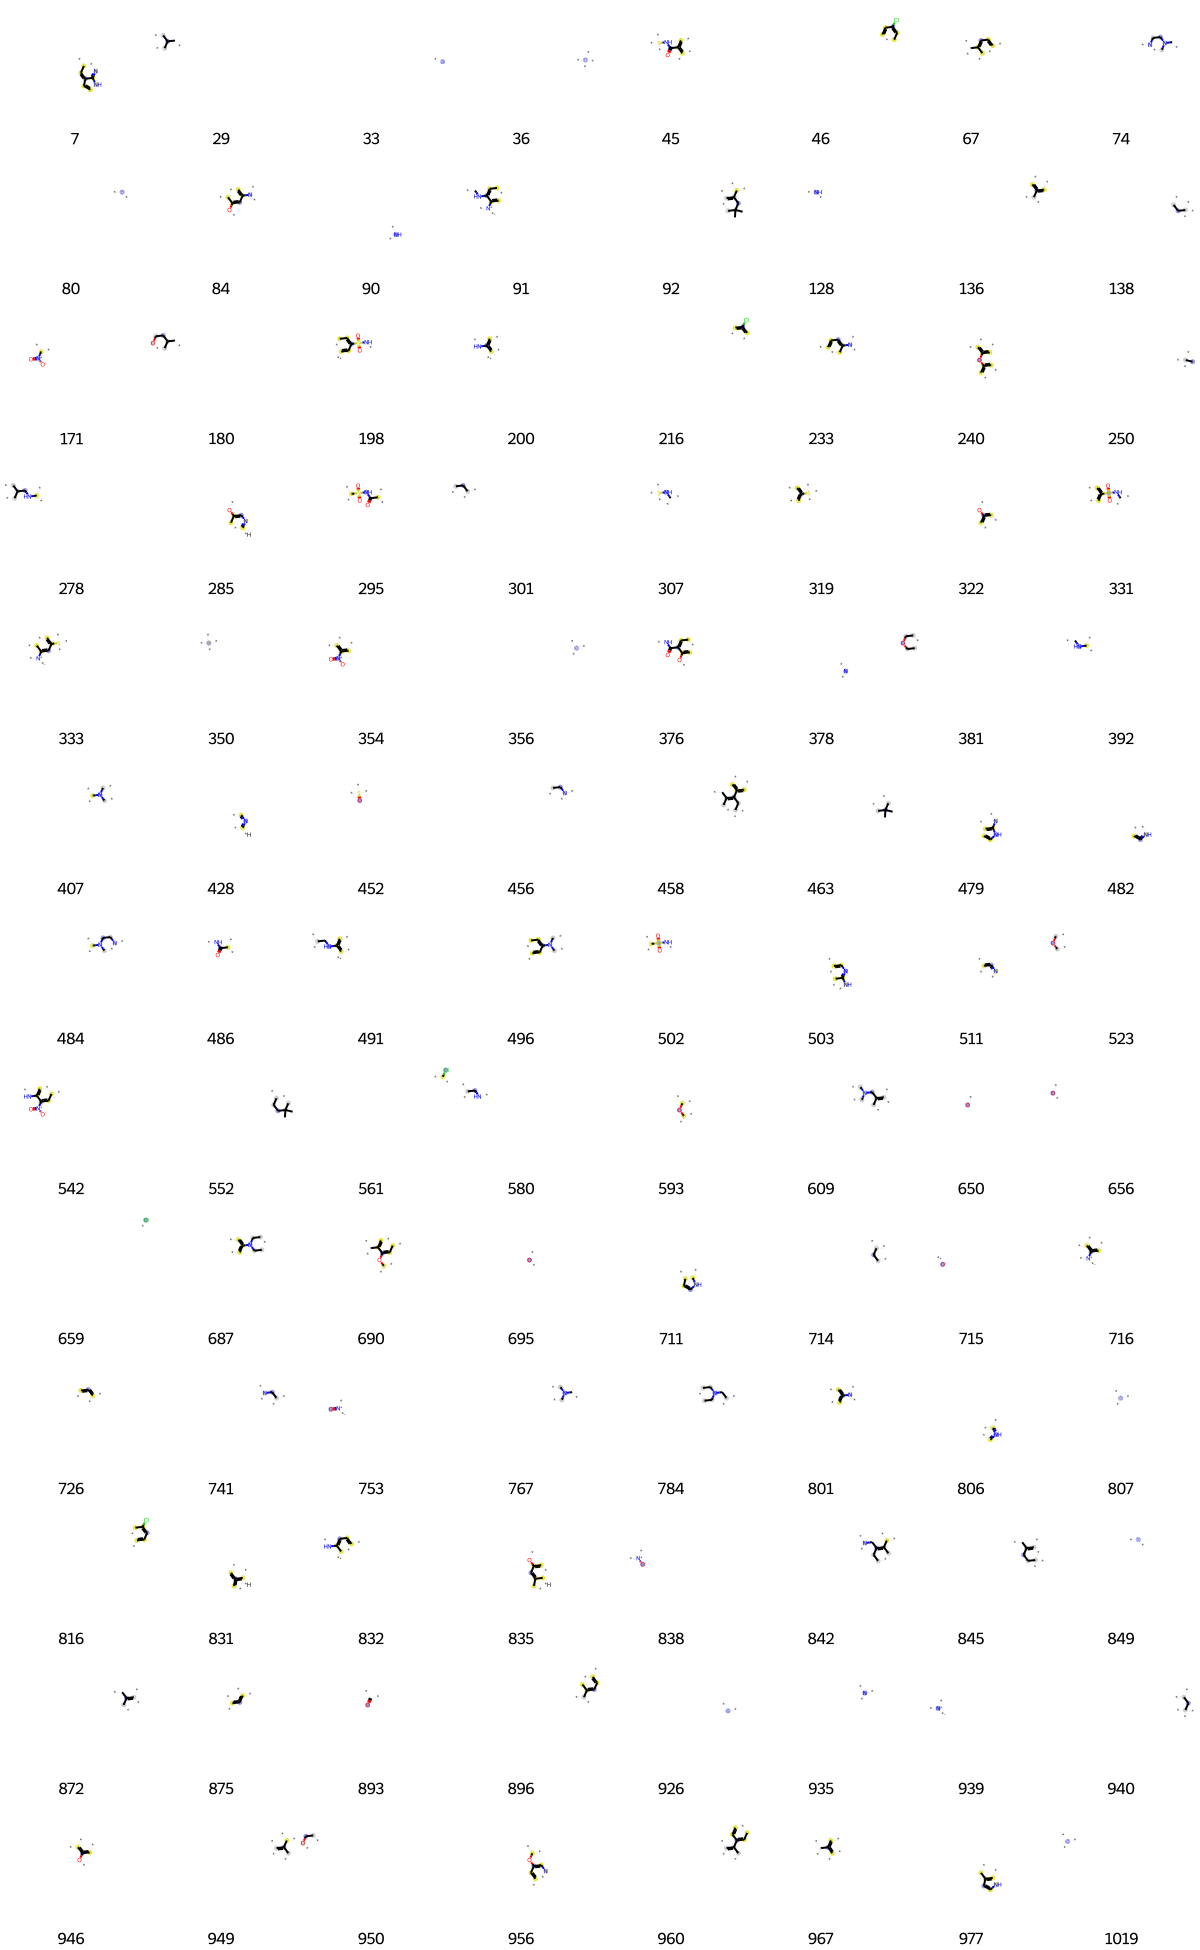

In [2363]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [2364]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[10,
 13,
 15,
 21,
 42,
 64,
 80,
 90,
 102,
 121,
 128,
 133,
 140,
 160,
 175,
 200,
 219,
 225,
 257,
 288,
 314,
 322,
 333,
 356,
 361,
 365,
 378,
 389,
 428,
 476,
 486,
 549,
 580,
 641,
 650,
 656,
 658,
 666,
 672,
 673,
 695,
 718,
 726,
 730,
 771,
 792,
 807,
 847,
 849,
 873,
 875,
 887,
 893,
 897,
 920,
 922,
 947,
 978,
 980,
 982]

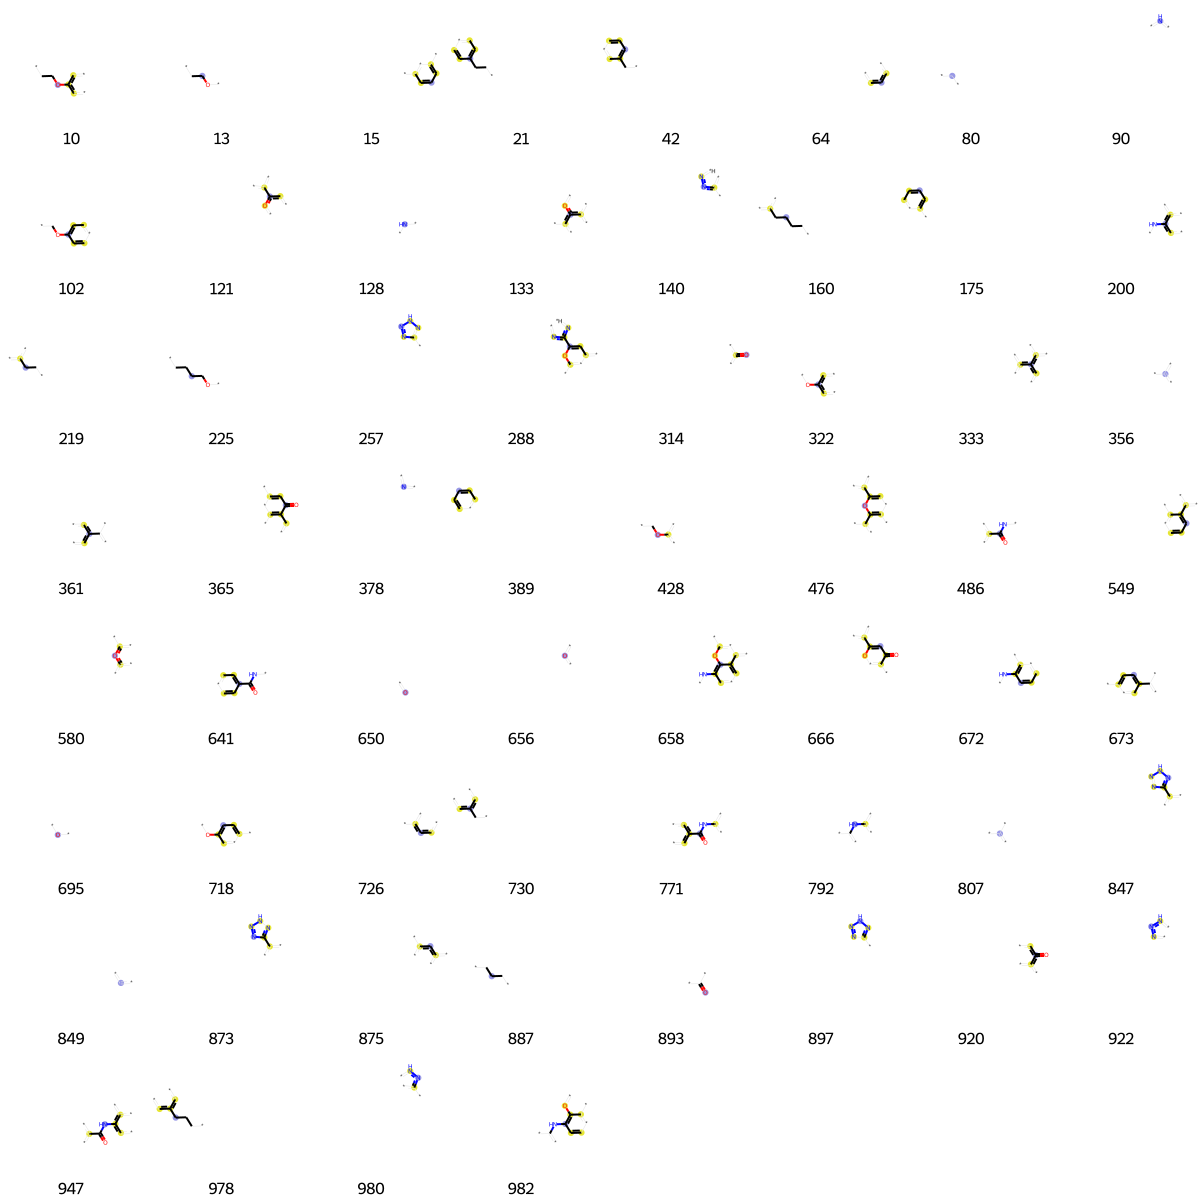

In [2365]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [2366]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 51,
 64,
 80,
 104,
 118,
 140,
 147,
 175,
 341,
 356,
 389,
 487,
 557,
 560,
 650,
 682,
 695,
 726,
 807,
 849,
 874,
 893,
 966]

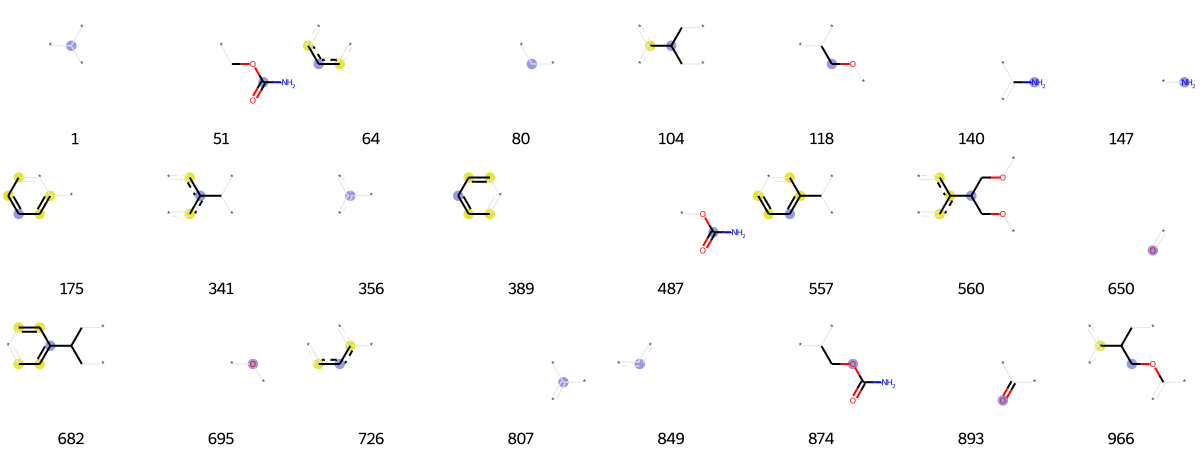

In [2367]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [2368]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[2,
 8,
 9,
 33,
 87,
 90,
 128,
 129,
 147,
 197,
 242,
 245,
 285,
 301,
 333,
 342,
 343,
 356,
 378,
 428,
 479,
 482,
 489,
 544,
 565,
 610,
 621,
 650,
 694,
 708,
 711,
 714,
 726,
 734,
 739,
 758,
 786,
 806,
 807,
 849,
 888,
 893,
 926,
 935,
 947,
 959,
 1004,
 1016,
 1019]

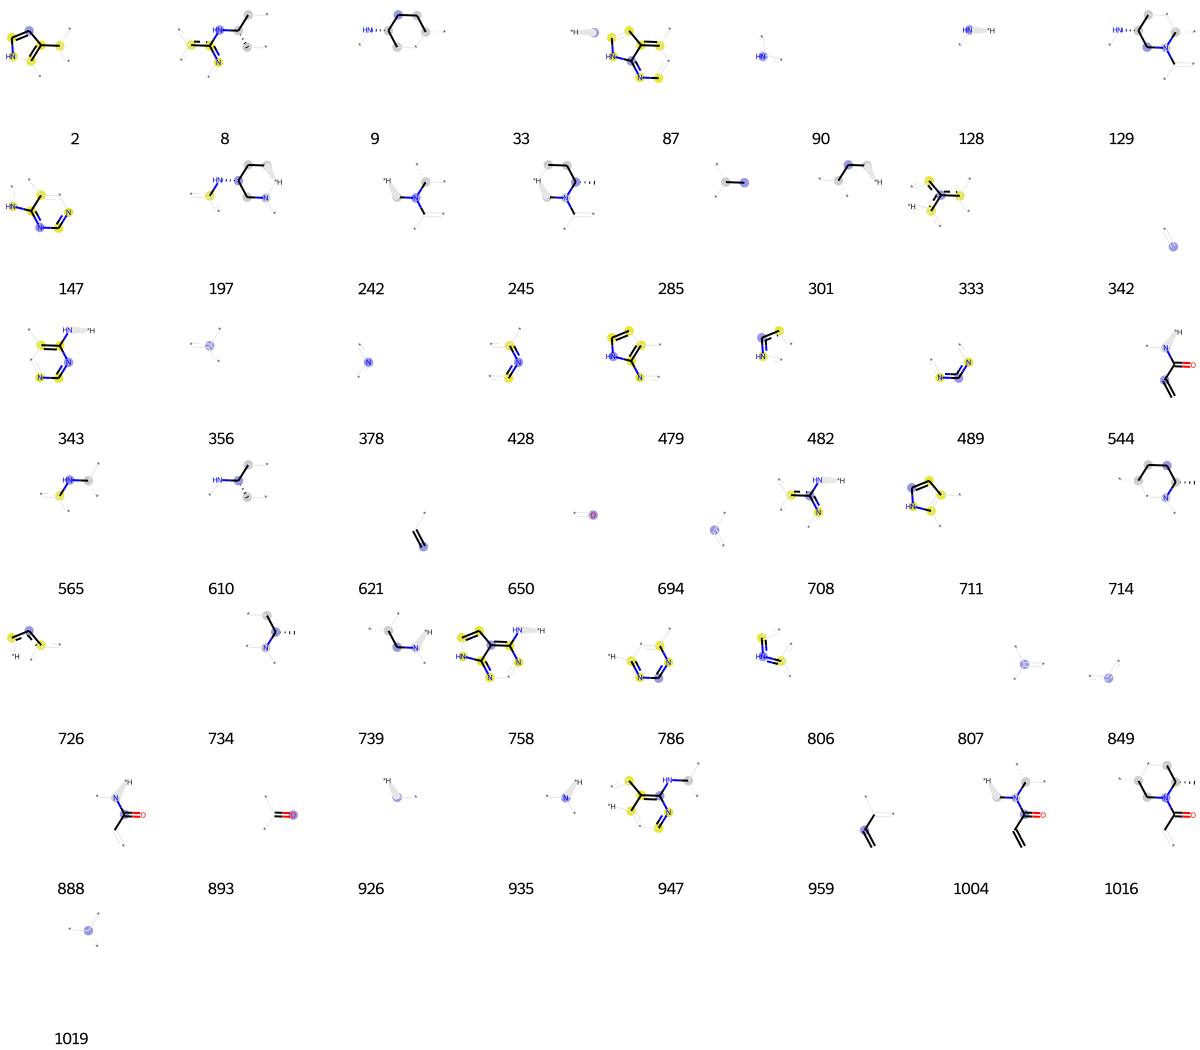

In [2369]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [2370]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[19,
 23,
 33,
 64,
 104,
 128,
 136,
 147,
 155,
 160,
 250,
 356,
 367,
 372,
 378,
 428,
 433,
 448,
 542,
 580,
 600,
 656,
 691,
 692,
 698,
 726,
 728,
 784,
 811,
 828,
 831,
 842,
 849,
 875,
 896,
 910]

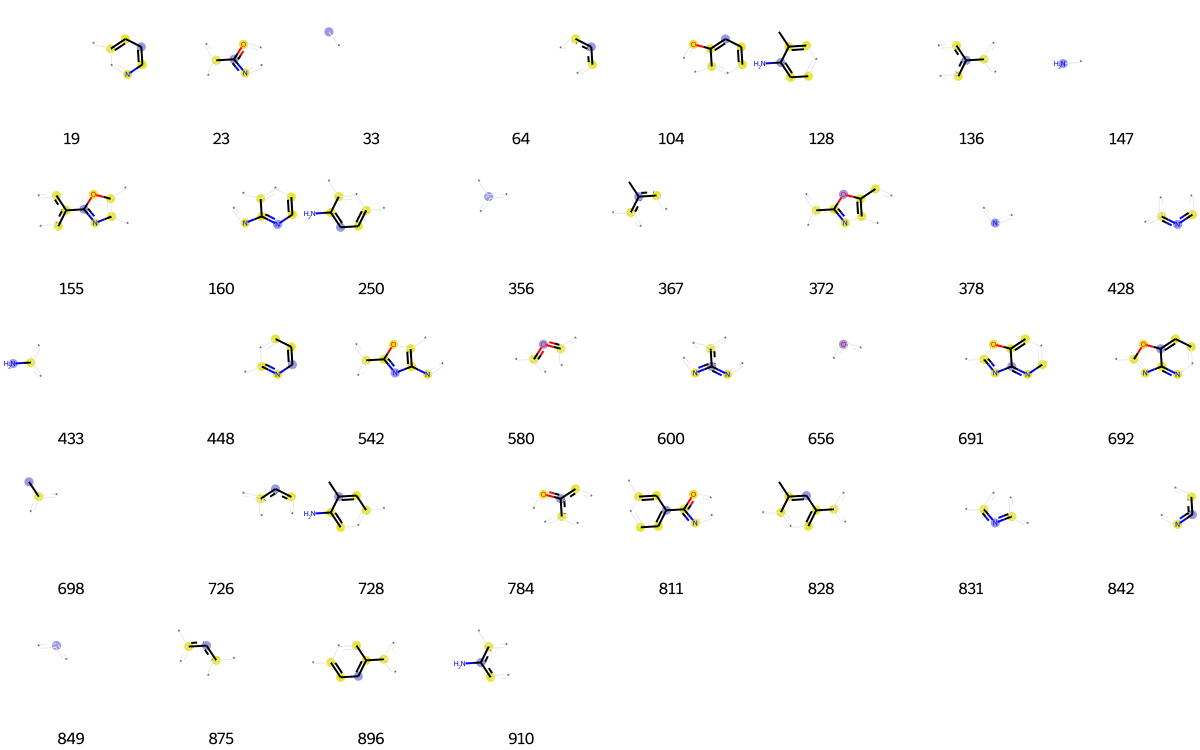

In [2371]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [2372]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[33,
 194,
 239,
 249,
 314,
 322,
 333,
 356,
 406,
 454,
 512,
 580,
 614,
 635,
 650,
 656,
 695,
 709,
 726,
 779,
 781,
 784,
 803,
 841,
 849,
 852,
 868,
 875,
 946]

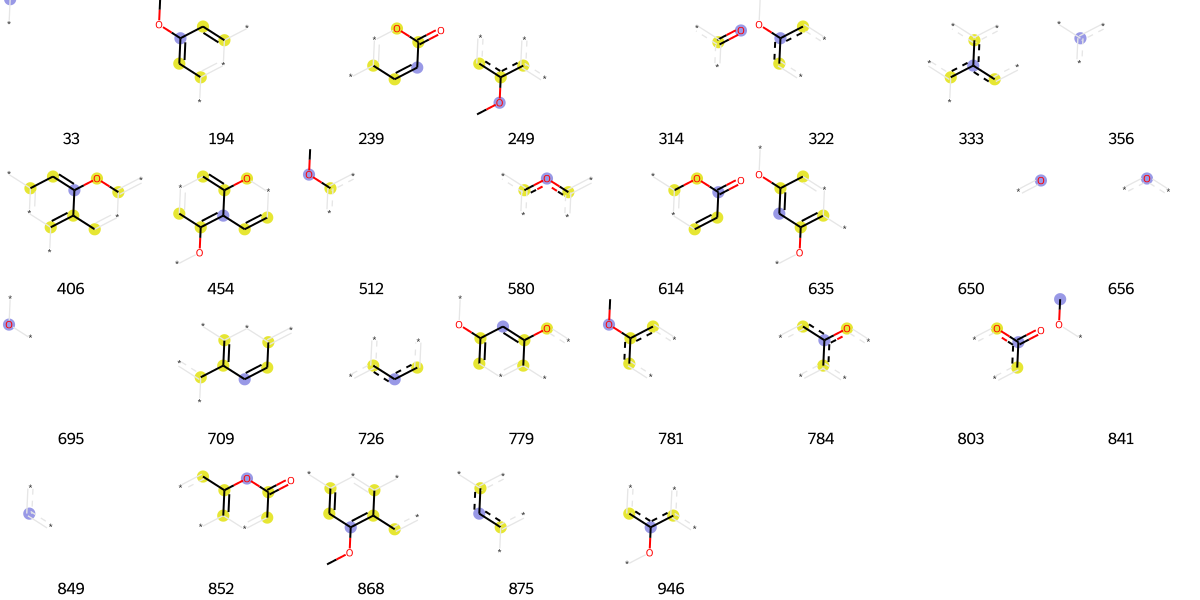

In [2373]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2374]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 19,
 42,
 61,
 64,
 67,
 73,
 80,
 128,
 129,
 162,
 175,
 219,
 224,
 231,
 262,
 282,
 289,
 345,
 351,
 356,
 360,
 378,
 392,
 428,
 437,
 461,
 483,
 501,
 511,
 557,
 558,
 562,
 579,
 602,
 637,
 645,
 667,
 674,
 675,
 716,
 726,
 730,
 772,
 787,
 790,
 795,
 831,
 842,
 849,
 876,
 885,
 911,
 980]

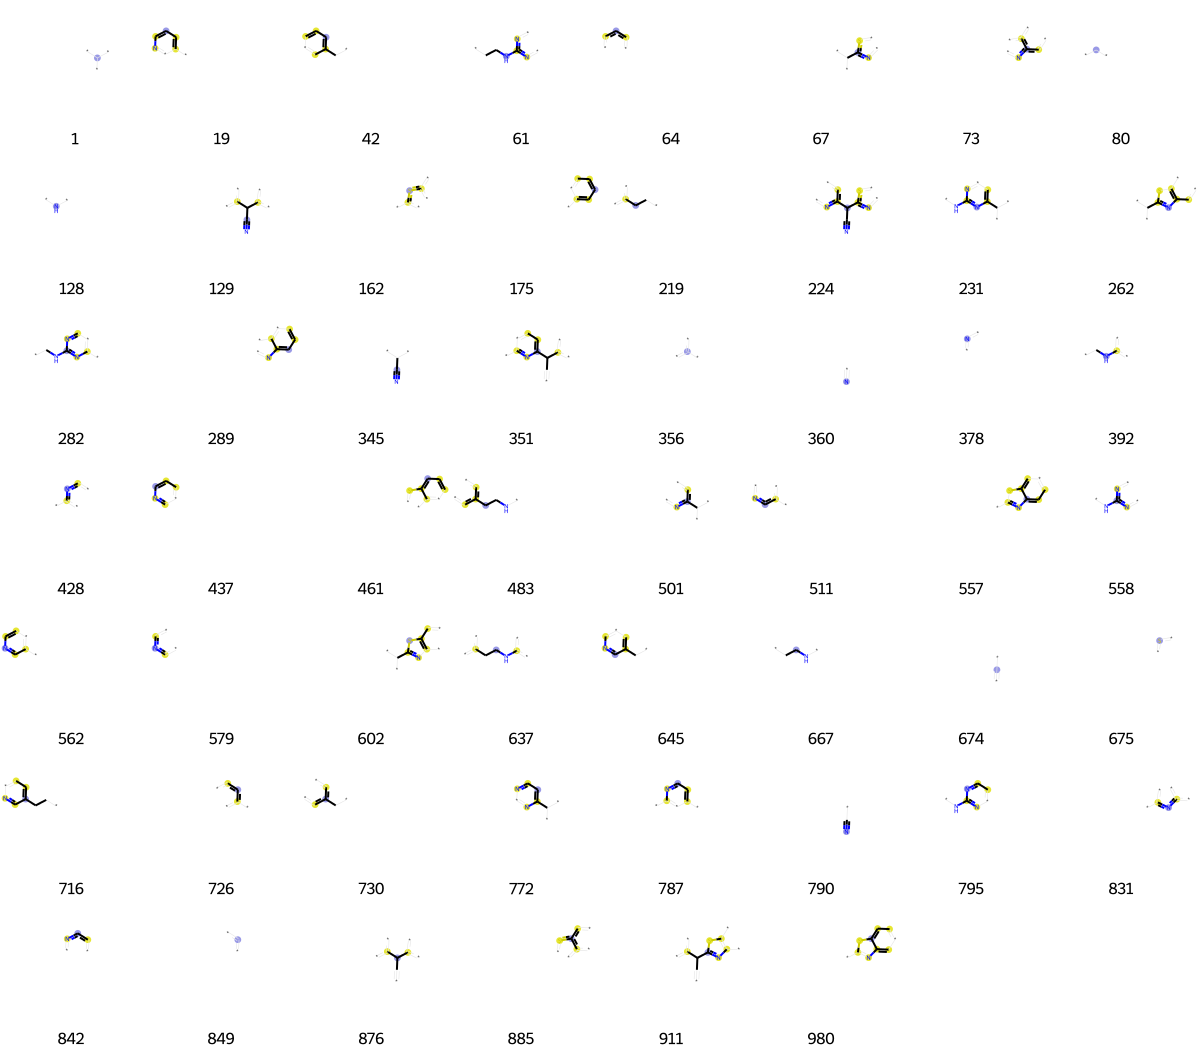

In [2375]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [2376]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 33,
 41,
 64,
 80,
 102,
 119,
 121,
 147,
 163,
 175,
 221,
 222,
 268,
 278,
 341,
 356,
 380,
 381,
 389,
 396,
 482,
 495,
 557,
 564,
 601,
 650,
 656,
 658,
 665,
 695,
 726,
 803,
 807,
 849,
 893,
 897,
 926,
 935,
 1019]

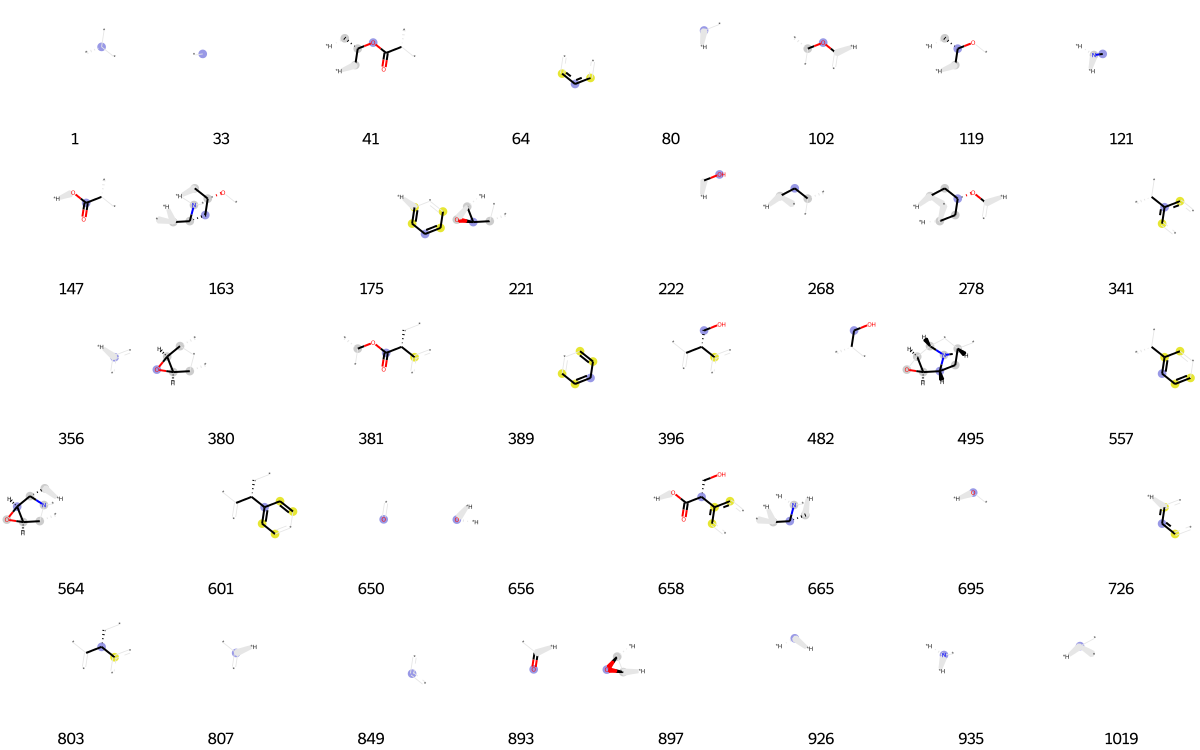

In [2377]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [2378]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[25,
 33,
 35,
 36,
 48,
 61,
 123,
 208,
 250,
 301,
 306,
 342,
 356,
 455,
 463,
 477,
 519,
 574,
 679,
 698,
 714,
 757,
 835,
 849,
 872,
 903,
 910,
 926,
 955,
 1019]

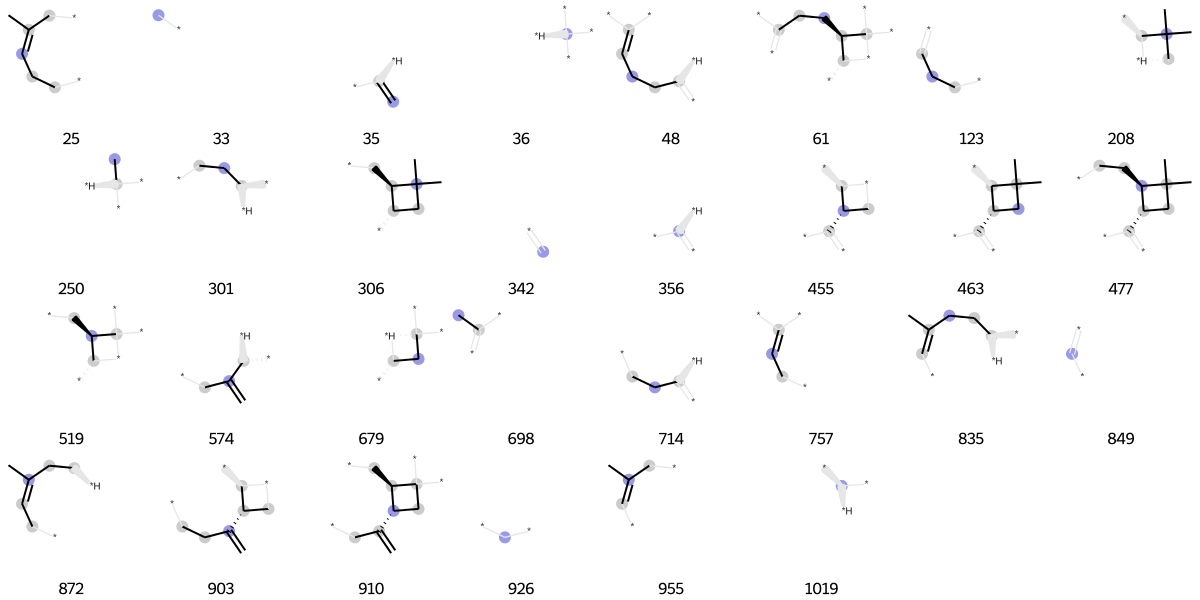

In [2379]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [2380]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 2,
 4,
 77,
 80,
 171,
 227,
 356,
 378,
 387,
 395,
 398,
 428,
 431,
 456,
 465,
 577,
 603,
 650,
 689,
 715,
 753,
 767,
 789,
 807,
 838,
 839,
 842,
 849,
 898,
 914,
 926,
 935,
 939,
 953,
 974,
 1011,
 1014]

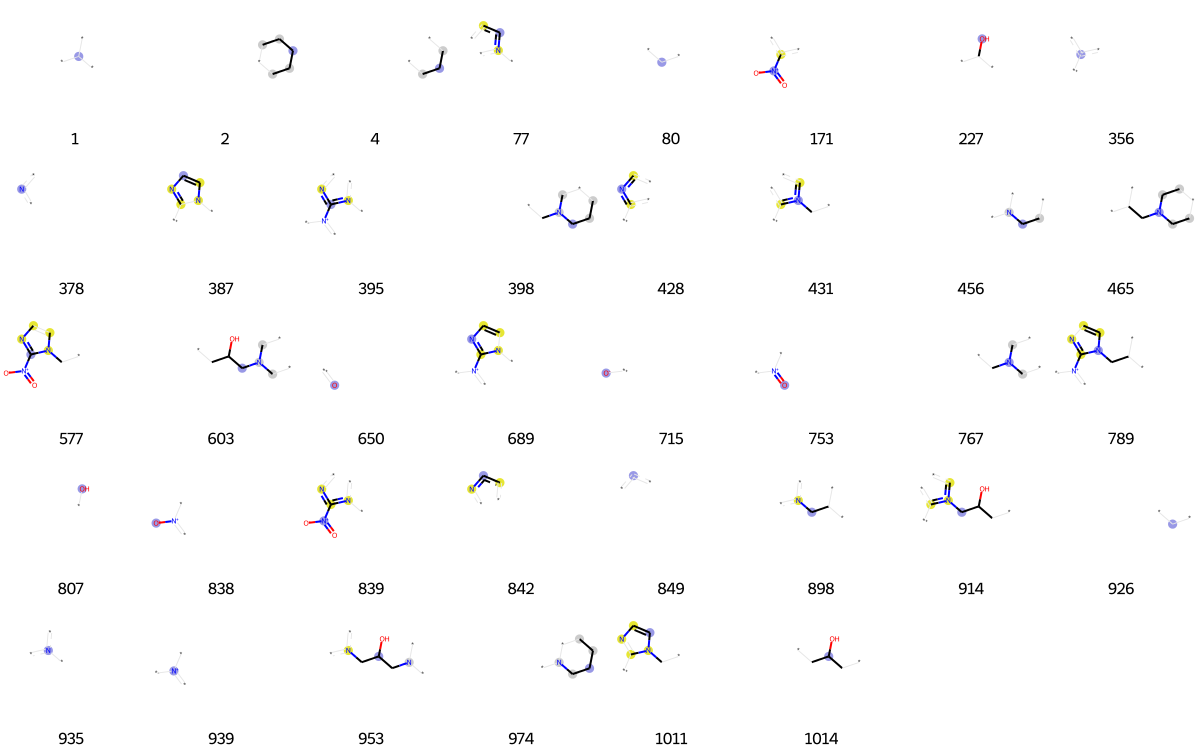

In [2381]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [2382]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 33,
 34,
 64,
 80,
 84,
 114,
 119,
 121,
 141,
 175,
 237,
 261,
 301,
 341,
 356,
 361,
 389,
 392,
 393,
 427,
 456,
 458,
 481,
 540,
 557,
 594,
 629,
 641,
 650,
 653,
 669,
 673,
 695,
 726,
 767,
 807,
 819,
 835,
 845,
 849,
 887,
 893,
 902,
 908,
 926,
 935,
 953,
 959,
 1019,
 1021]

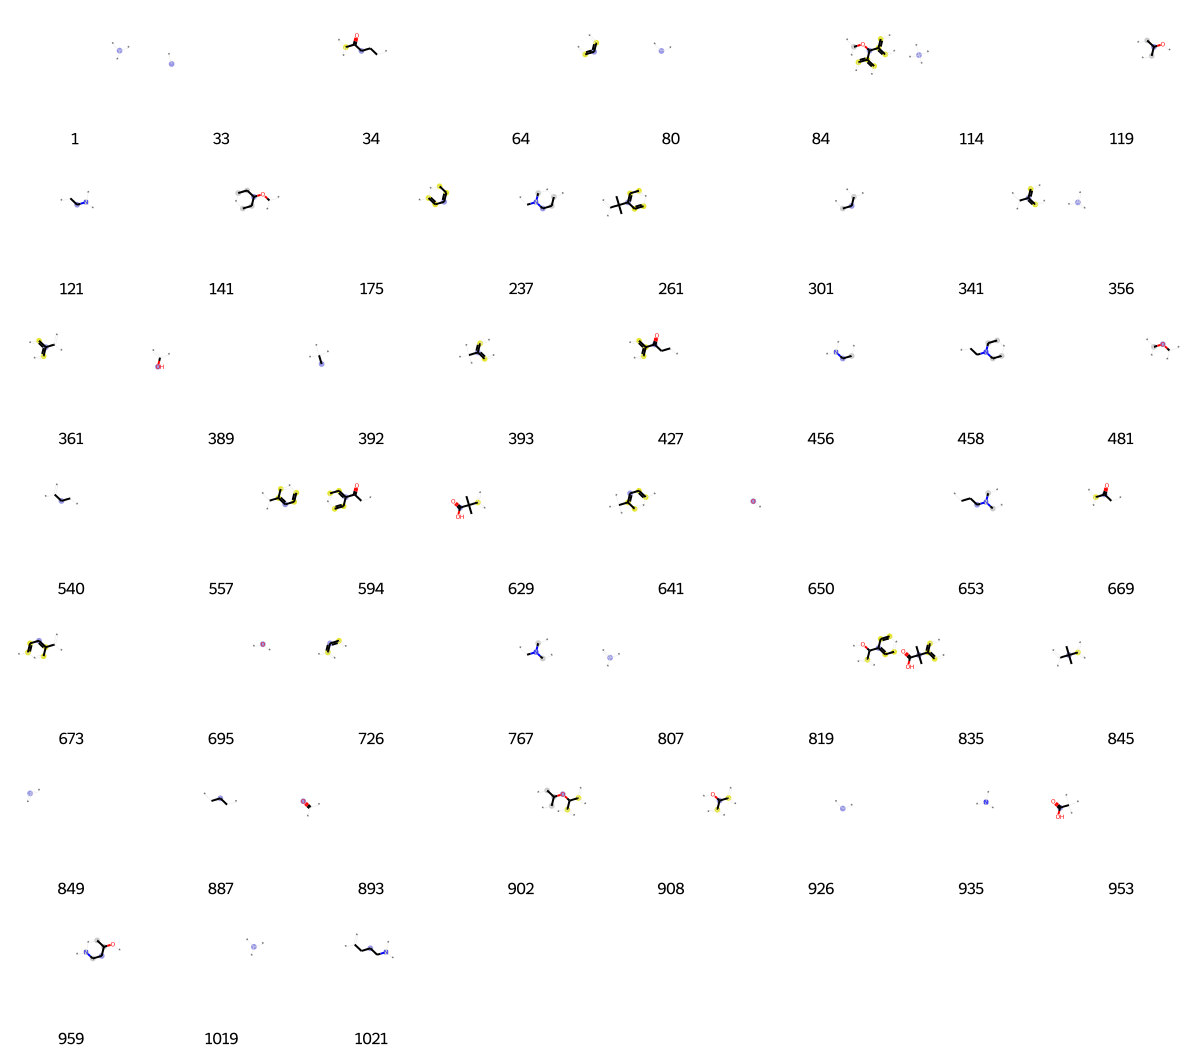

In [2383]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [2384]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 33,
 115,
 147,
 226,
 227,
 283,
 340,
 357,
 389,
 418,
 650,
 669,
 727,
 786,
 807,
 820,
 893]

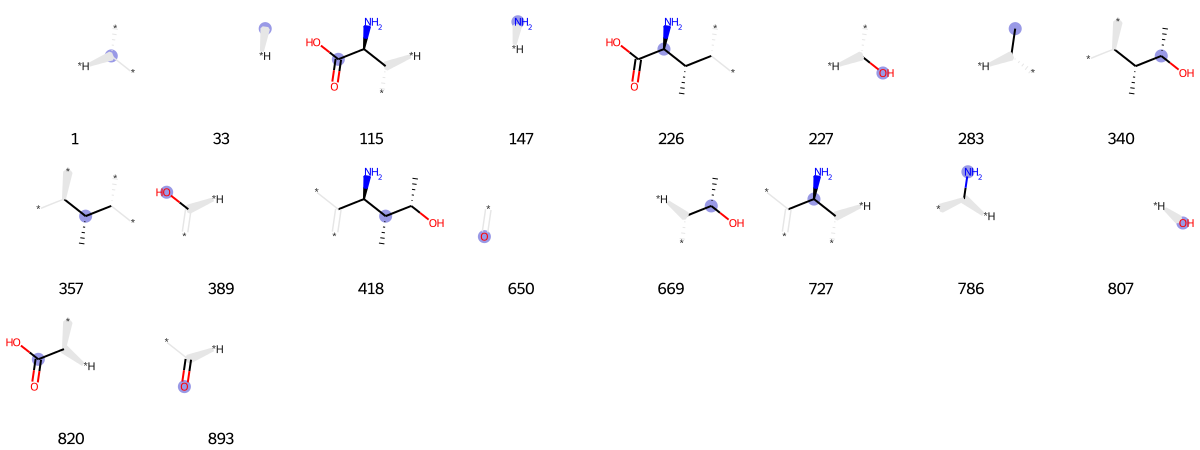

In [2385]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [2386]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[80,
 89,
 210,
 222,
 233,
 268,
 388,
 407,
 463,
 472,
 476,
 492,
 610,
 621,
 656,
 740,
 807,
 849,
 897,
 926,
 1019]

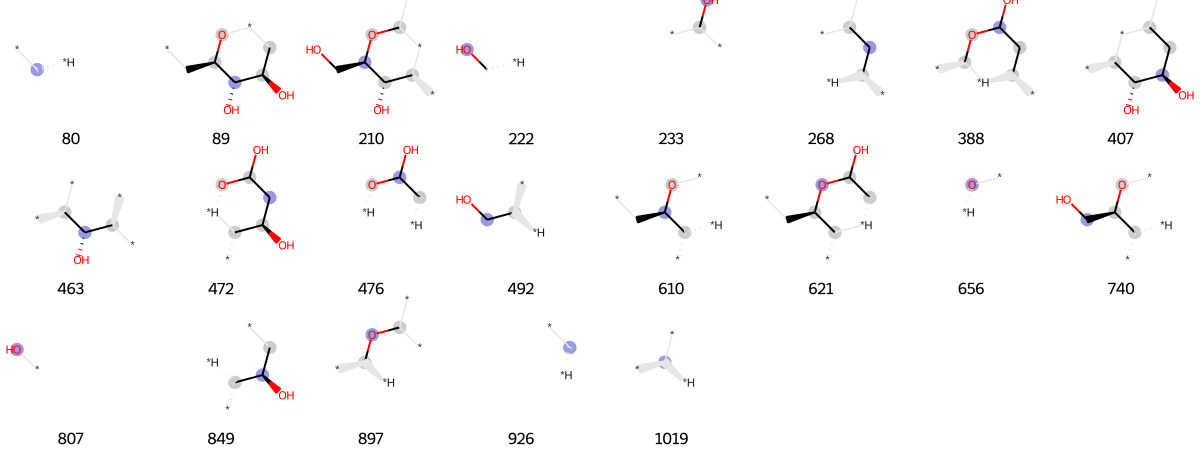

In [2387]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [2388]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[0,
 1,
 5,
 17,
 33,
 41,
 80,
 90,
 116,
 128,
 147,
 208,
 227,
 263,
 268,
 283,
 285,
 314,
 326,
 350,
 356,
 389,
 430,
 438,
 452,
 456,
 470,
 483,
 550,
 568,
 580,
 583,
 602,
 614,
 624,
 638,
 650,
 652,
 686,
 687,
 703,
 705,
 709,
 807,
 871,
 893,
 898,
 926,
 934,
 935,
 936,
 960,
 989,
 994,
 1019]

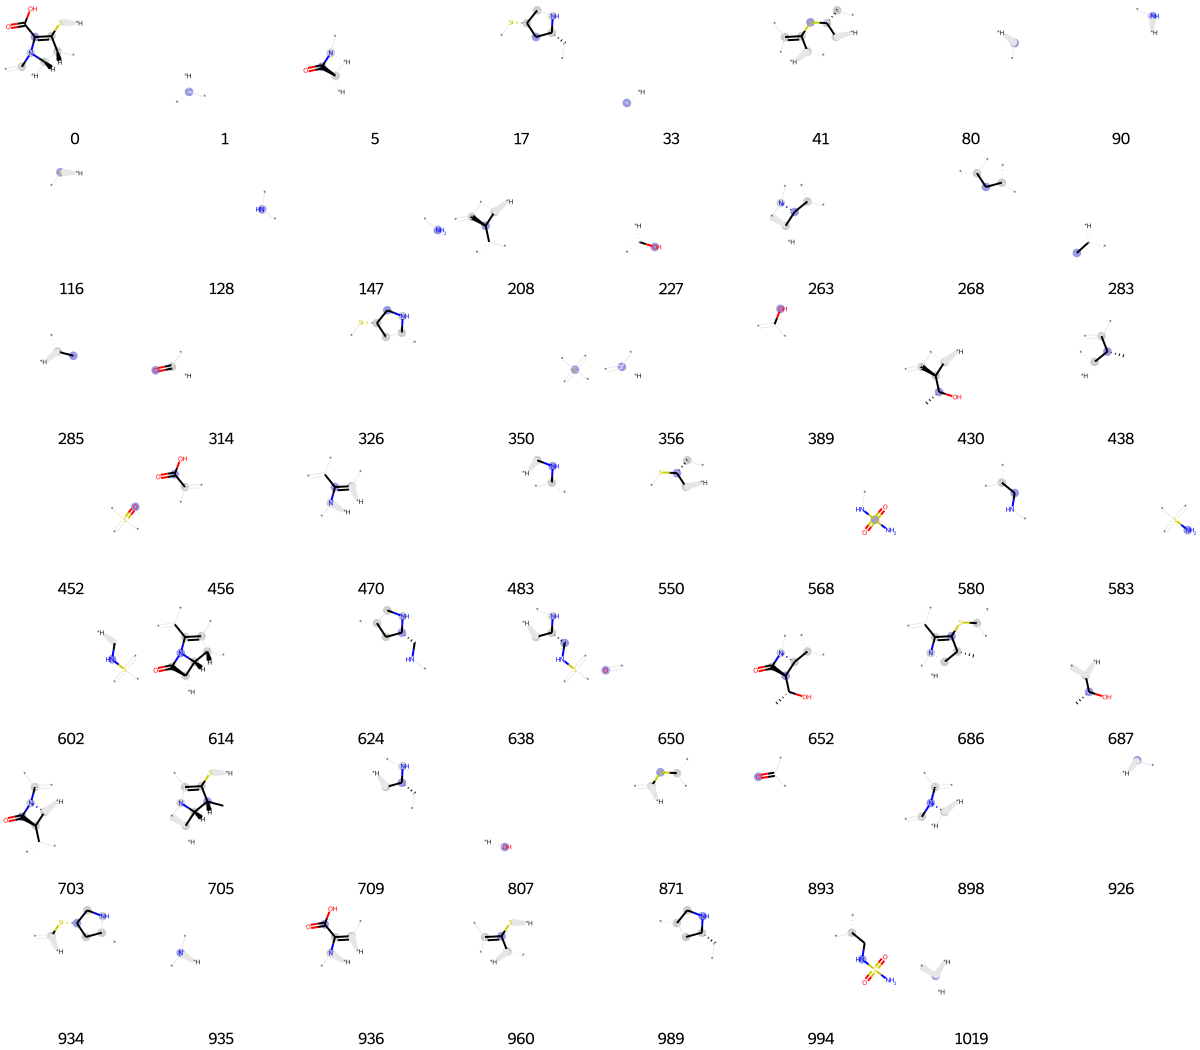

In [2389]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [2390]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[33,
 53,
 56,
 64,
 73,
 128,
 156,
 162,
 175,
 191,
 317,
 322,
 356,
 376,
 378,
 385,
 389,
 493,
 512,
 557,
 645,
 650,
 675,
 695,
 703,
 716,
 718,
 726,
 781,
 792,
 807,
 831,
 841,
 849,
 875,
 885,
 893,
 948,
 961,
 965,
 966]

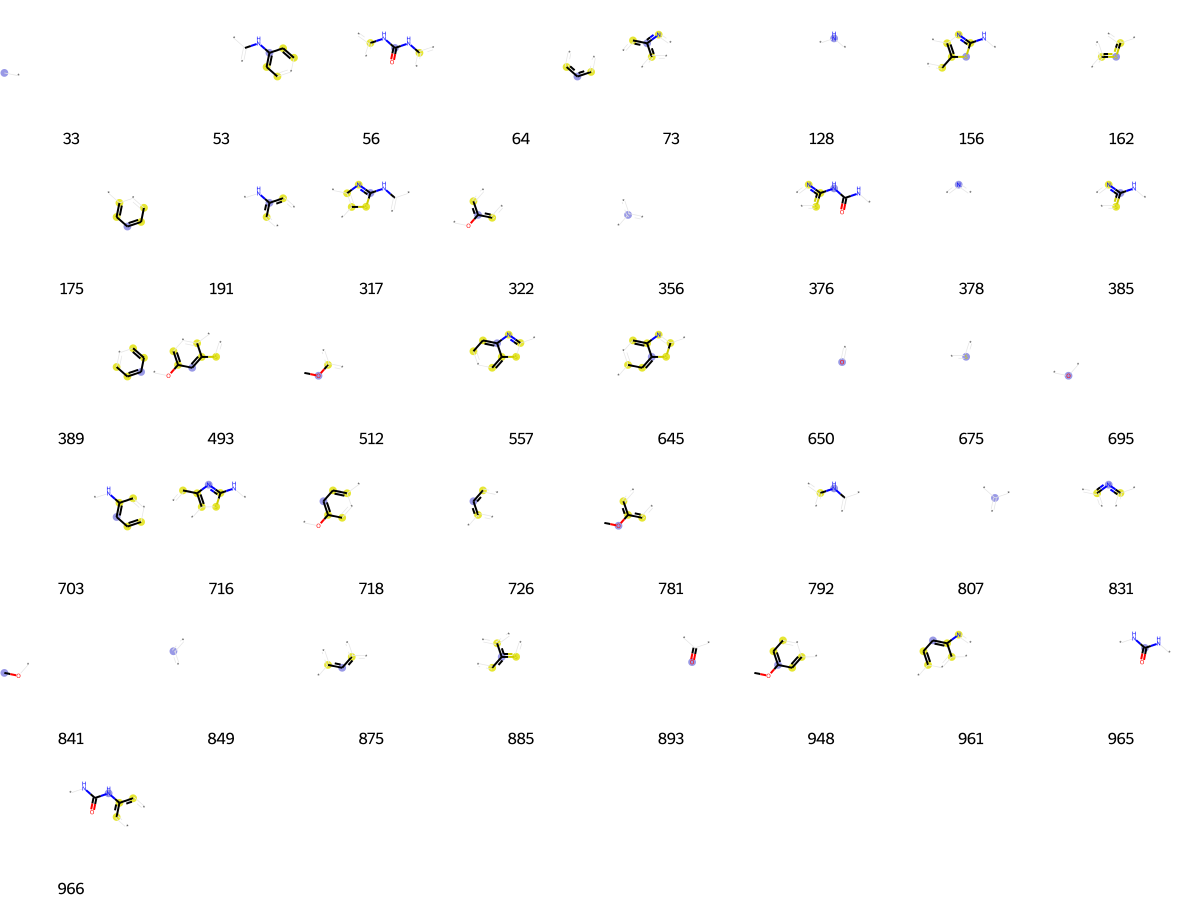

In [2391]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [2392]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 33,
 38,
 45,
 62,
 73,
 79,
 80,
 90,
 222,
 227,
 238,
 249,
 260,
 274,
 314,
 323,
 356,
 367,
 369,
 370,
 378,
 482,
 553,
 650,
 657,
 698,
 699,
 706,
 721,
 749,
 750,
 802,
 807,
 829,
 831,
 849,
 875,
 888,
 891,
 898,
 908,
 935,
 966,
 1018]

In [2393]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[11,
 33,
 64,
 126,
 128,
 162,
 164,
 171,
 175,
 356,
 376,
 378,
 385,
 386,
 419,
 423,
 428,
 444,
 486,
 511,
 624,
 650,
 675,
 695,
 705,
 707,
 715,
 726,
 751,
 753,
 758,
 792,
 807,
 838,
 847,
 849,
 893,
 909,
 939,
 946,
 957,
 967,
 1004,
 1017]

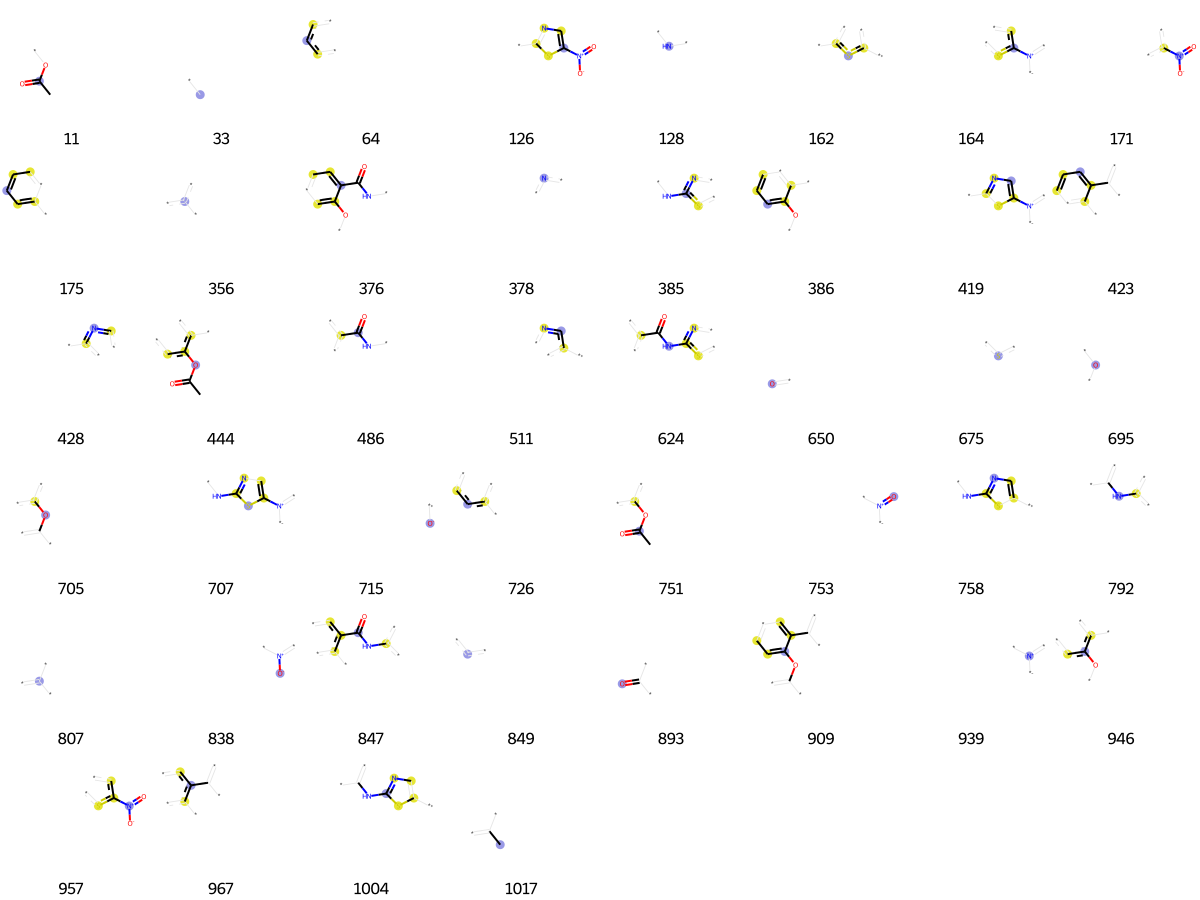

In [2394]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [2395]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[19,
 33,
 67,
 72,
 74,
 80,
 90,
 112,
 117,
 136,
 139,
 162,
 210,
 233,
 245,
 259,
 277,
 288,
 289,
 294,
 323,
 356,
 360,
 367,
 378,
 386,
 394,
 407,
 456,
 464,
 471,
 484,
 558,
 568,
 590,
 607,
 642,
 646,
 650,
 672,
 674,
 675,
 687,
 694,
 695,
 698,
 699,
 701,
 726,
 739,
 767,
 775,
 784,
 790,
 797,
 801,
 807,
 827,
 831,
 849,
 873,
 875,
 881,
 893,
 896,
 898,
 904,
 907,
 926,
 935,
 945,
 964,
 969,
 985,
 1009,
 1013,
 1019]

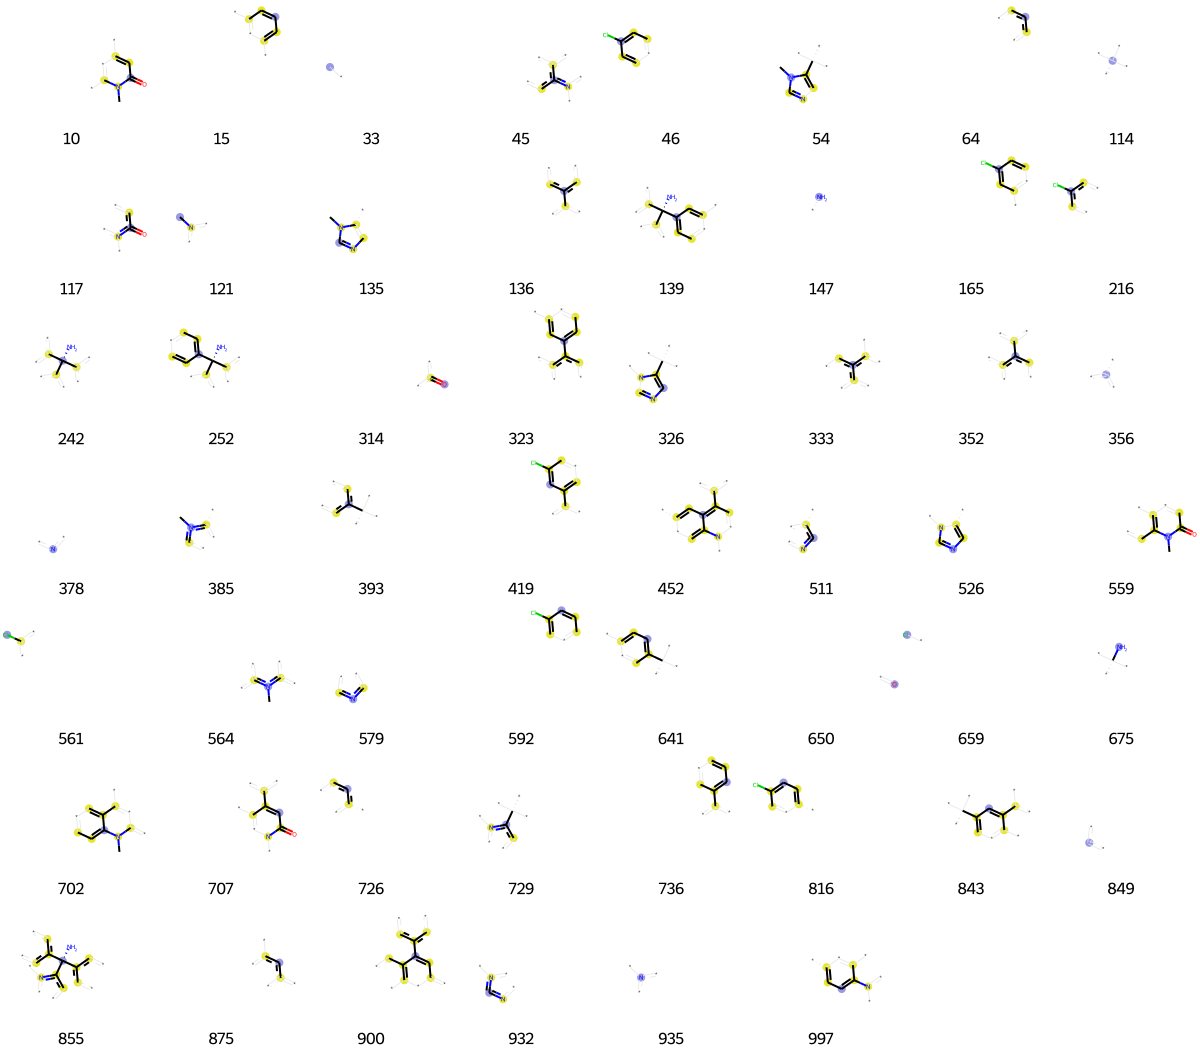

In [2396]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [2397]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[4,
 14,
 33,
 64,
 72,
 121,
 132,
 241,
 313,
 333,
 356,
 378,
 383,
 391,
 456,
 543,
 595,
 669,
 675,
 694,
 722,
 726,
 747,
 800,
 835,
 843,
 849,
 881,
 926,
 935,
 958,
 984]

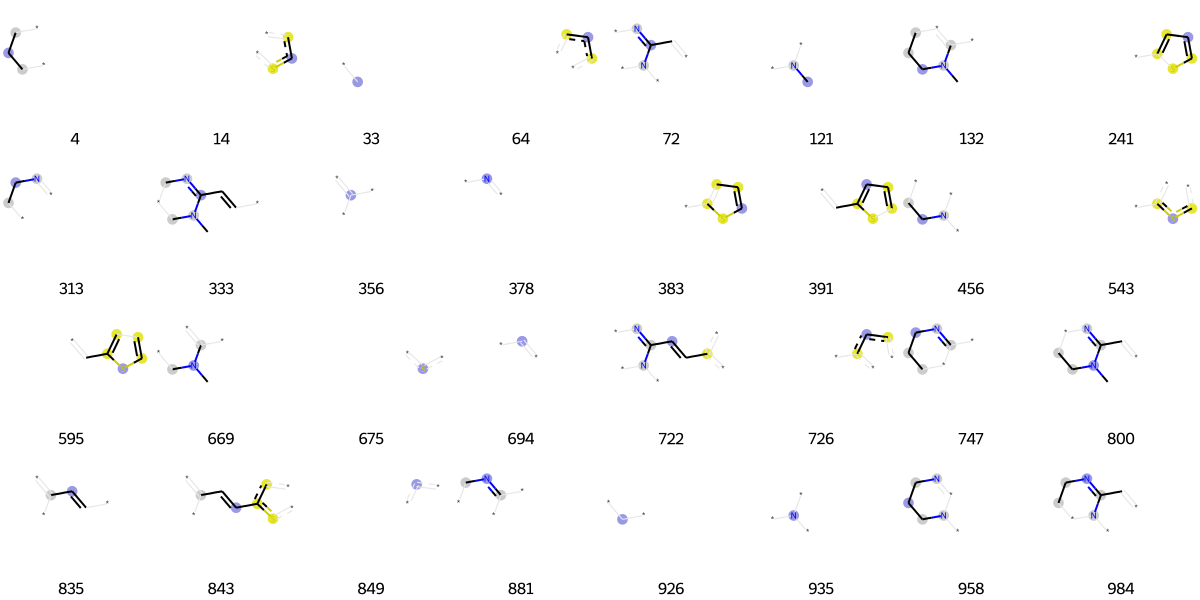

In [2398]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [2399]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[25,
 33,
 36,
 38,
 46,
 124,
 138,
 147,
 214,
 250,
 265,
 279,
 284,
 285,
 299,
 301,
 340,
 391,
 501,
 519,
 529,
 562,
 611,
 656,
 661,
 695,
 709,
 785,
 801,
 835,
 841,
 861,
 864,
 892,
 897,
 926,
 937,
 1003,
 1019]

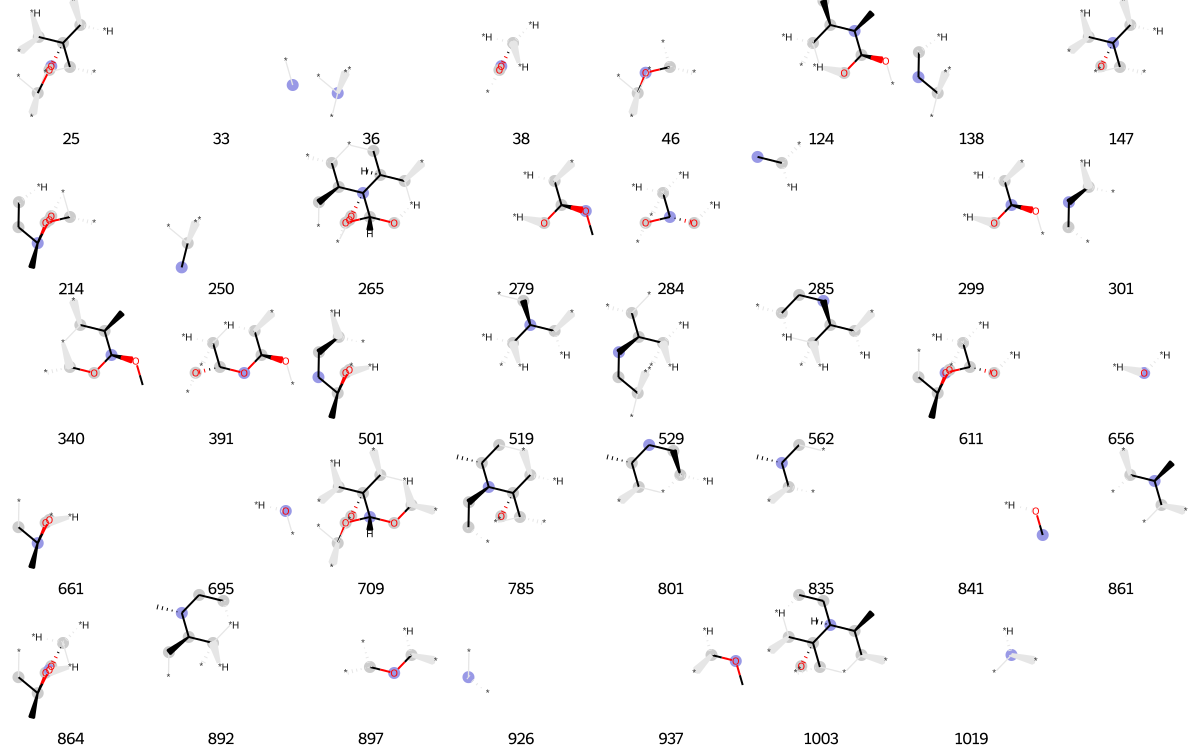

In [2400]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [2401]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[0,
 1,
 79,
 80,
 147,
 197,
 290,
 322,
 333,
 346,
 356,
 384,
 387,
 389,
 403,
 451,
 473,
 578,
 582,
 583,
 593,
 650,
 661,
 695,
 718,
 726,
 730,
 731,
 739,
 786,
 807,
 820,
 825,
 849,
 875,
 893,
 936,
 947,
 1017]

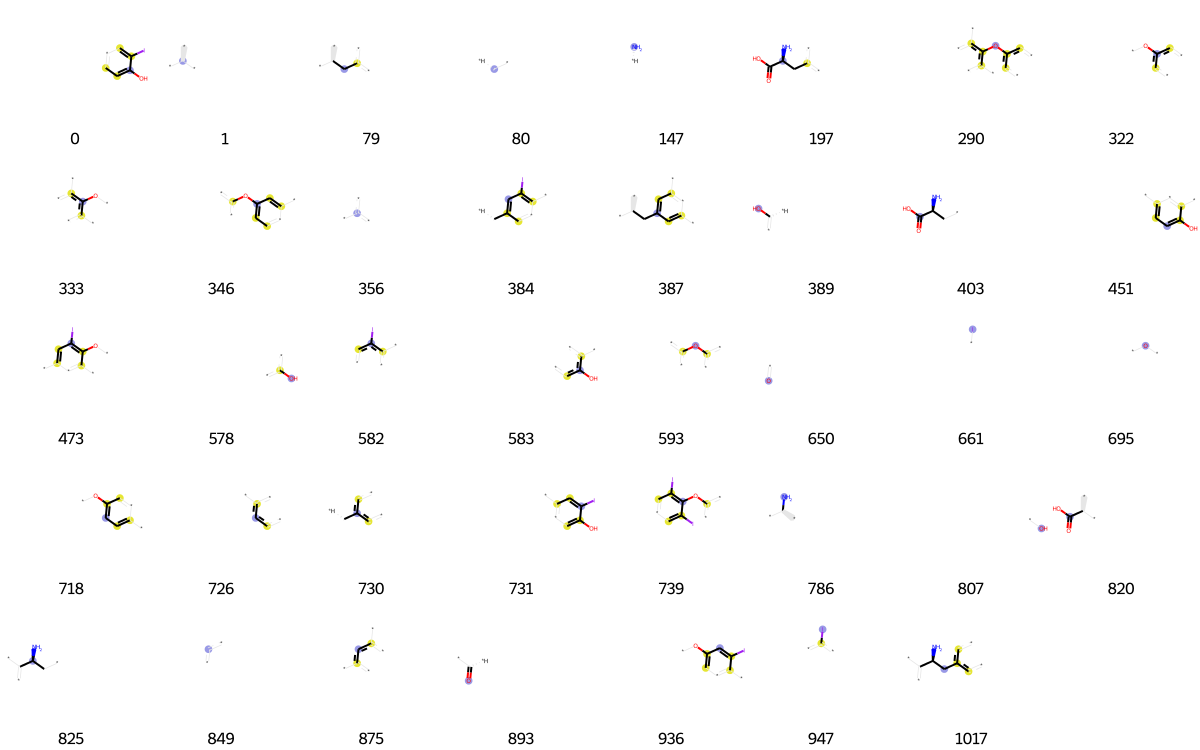

In [2402]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2403]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 13,
 33,
 64,
 65,
 77,
 79,
 80,
 97,
 106,
 110,
 114,
 121,
 128,
 140,
 146,
 147,
 175,
 196,
 212,
 213,
 222,
 240,
 265,
 283,
 309,
 356,
 386,
 387,
 411,
 428,
 429,
 456,
 473,
 487,
 490,
 493,
 494,
 513,
 556,
 650,
 667,
 695,
 704,
 714,
 716,
 726,
 730,
 782,
 807,
 809,
 849,
 864,
 875,
 887,
 893,
 904,
 926,
 929,
 935,
 940,
 946,
 951,
 967,
 980,
 994,
 1021]

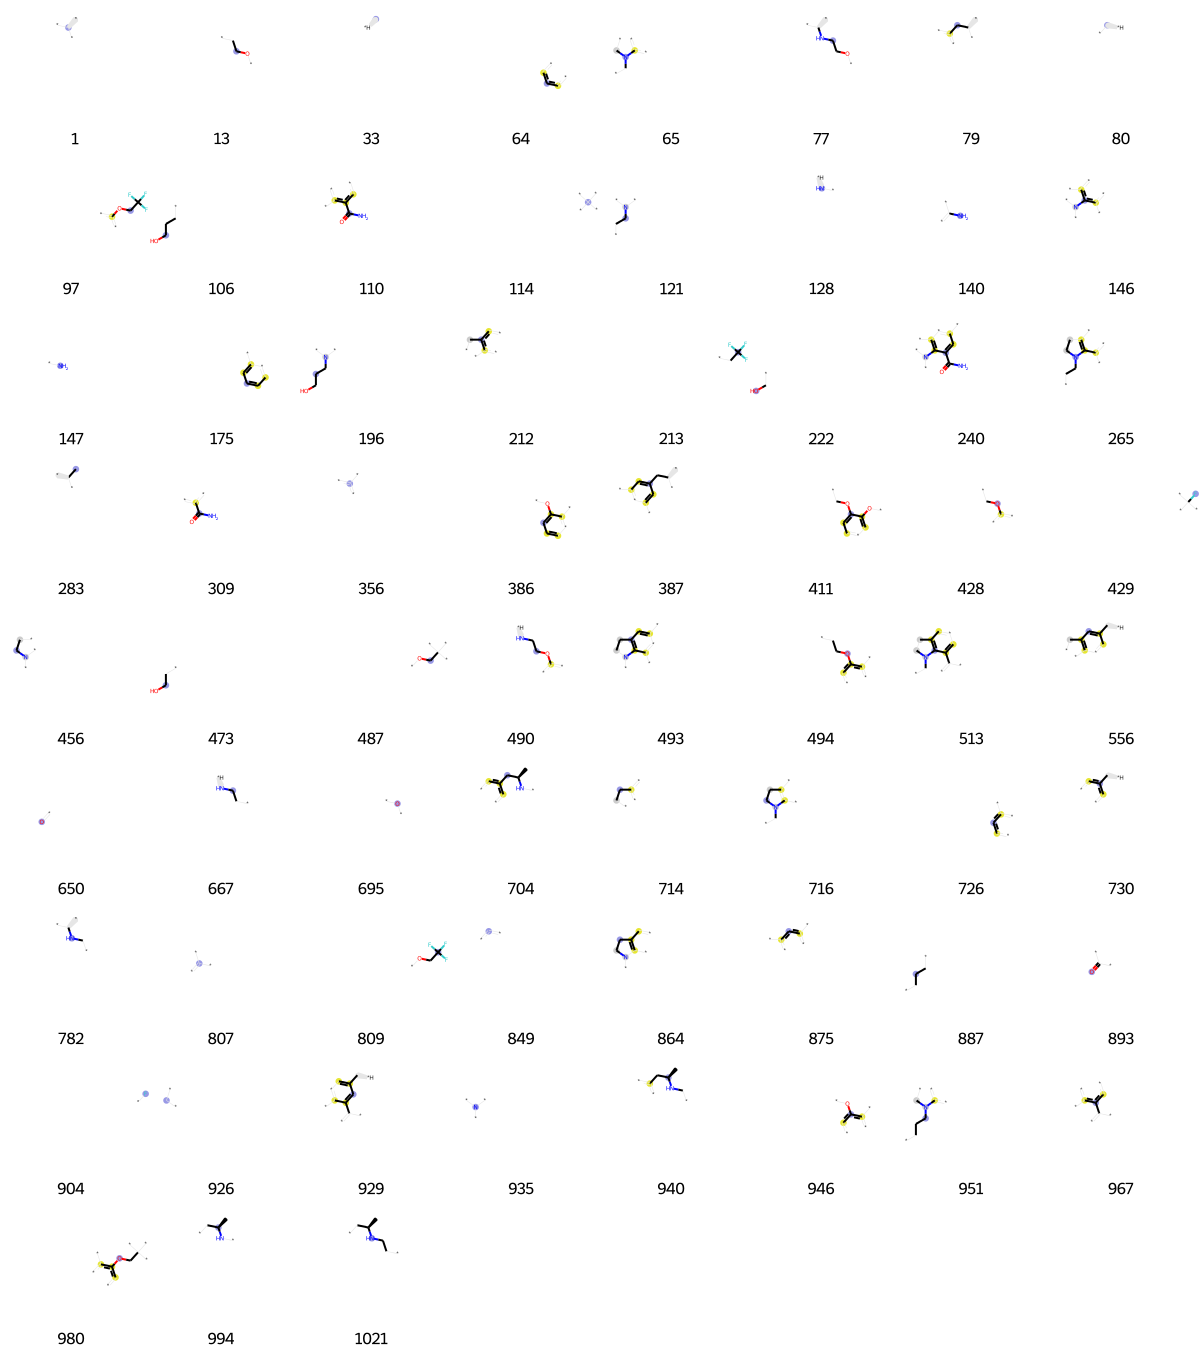

In [2404]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [2405]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 4,
 8,
 15,
 33,
 59,
 62,
 64,
 75,
 80,
 104,
 116,
 128,
 205,
 210,
 214,
 222,
 227,
 236,
 243,
 246,
 283,
 296,
 325,
 341,
 350,
 352,
 356,
 378,
 396,
 421,
 452,
 456,
 482,
 539,
 546,
 570,
 573,
 585,
 586,
 650,
 664,
 695,
 699,
 726,
 762,
 807,
 816,
 831,
 833,
 849,
 862,
 866,
 875,
 888,
 897,
 904,
 908,
 926,
 935,
 983,
 1000,
 1016]

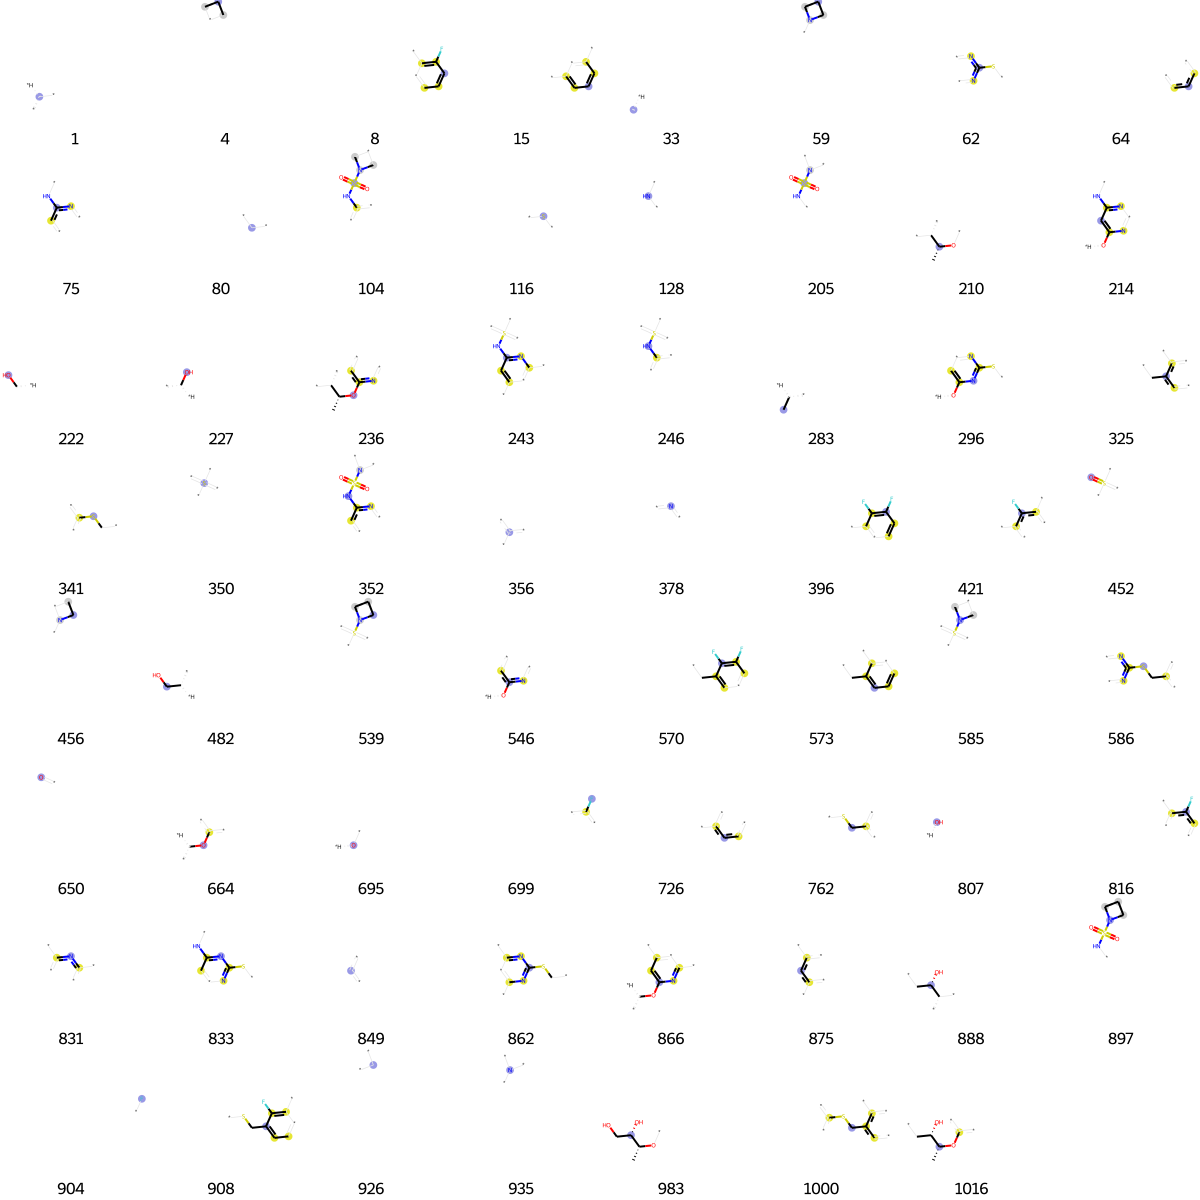

In [2406]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [2407]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[15,
 31,
 33,
 42,
 64,
 80,
 128,
 147,
 168,
 197,
 209,
 255,
 271,
 356,
 408,
 549,
 623,
 724,
 726,
 730,
 755,
 807,
 849,
 875,
 877,
 981,
 1017]

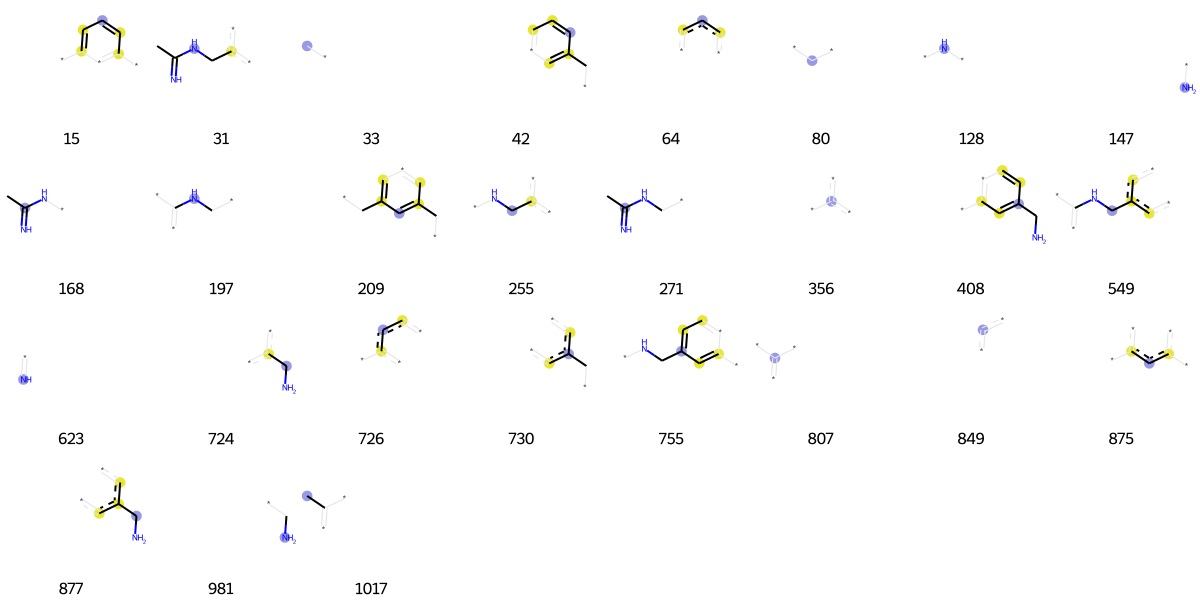

In [2408]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2409]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 46,
 80,
 104,
 117,
 147,
 158,
 216,
 266,
 341,
 356,
 368,
 389,
 450,
 561,
 650,
 659,
 682,
 713,
 726,
 807,
 816,
 829,
 849,
 885,
 893,
 981]

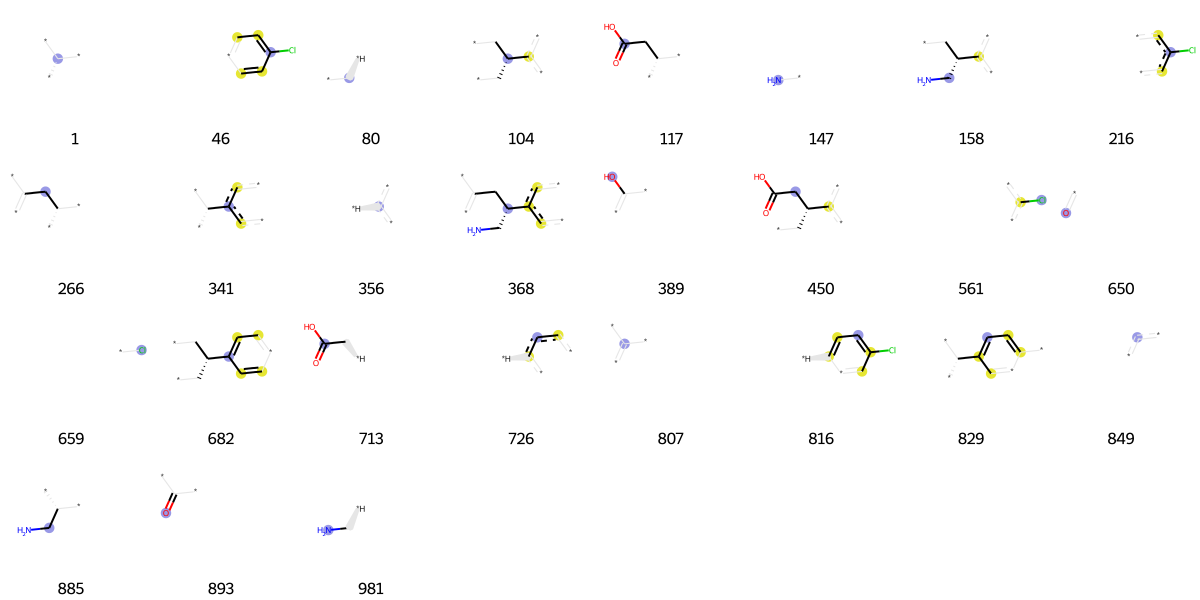

In [2410]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2411]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[2,
 33,
 41,
 64,
 65,
 73,
 80,
 128,
 156,
 162,
 170,
 175,
 219,
 235,
 289,
 317,
 356,
 358,
 378,
 385,
 461,
 540,
 554,
 557,
 645,
 650,
 675,
 694,
 698,
 716,
 717,
 726,
 735,
 792,
 799,
 807,
 831,
 849,
 875,
 885,
 887,
 893,
 961,
 974,
 980,
 1013,
 1014]

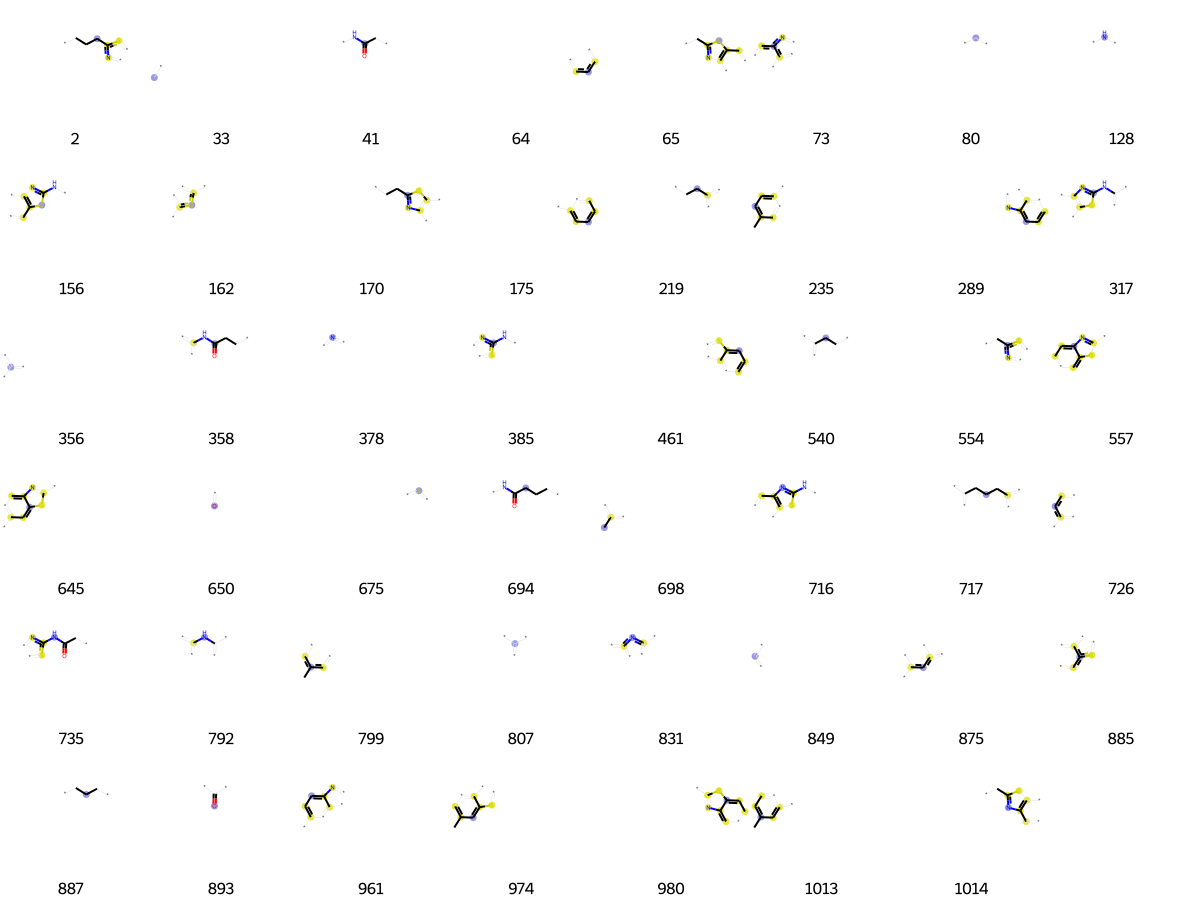

In [2412]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2413]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 13,
 31,
 33,
 45,
 49,
 80,
 86,
 96,
 119,
 147,
 225,
 226,
 227,
 233,
 243,
 263,
 283,
 311,
 374,
 389,
 421,
 435,
 436,
 447,
 463,
 540,
 579,
 583,
 610,
 650,
 656,
 669,
 676,
 690,
 694,
 695,
 710,
 713,
 796,
 797,
 802,
 804,
 807,
 820,
 828,
 887,
 893,
 897,
 899,
 926,
 930,
 931,
 976,
 1004,
 1017,
 1019,
 1020]

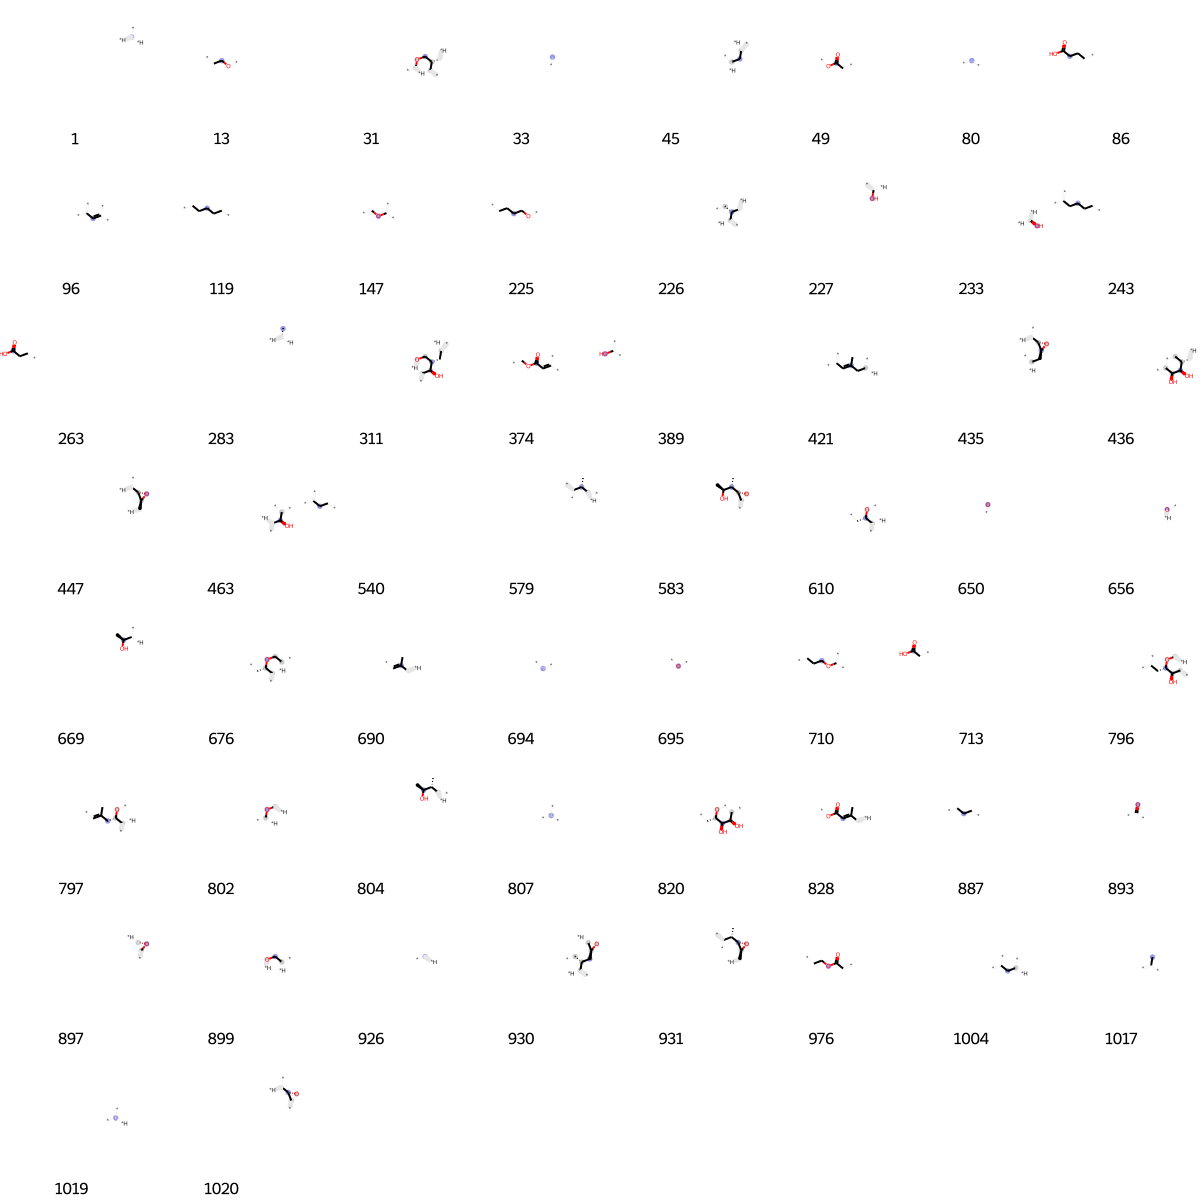

In [2414]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [2415]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[33,
 74,
 92,
 144,
 147,
 217,
 248,
 252,
 319,
 350,
 356,
 378,
 433,
 452,
 507,
 518,
 534,
 564,
 590,
 613,
 650,
 656,
 657,
 698,
 715,
 726,
 762,
 776,
 780,
 807,
 815,
 849,
 881,
 888,
 893,
 914,
 922,
 1017]

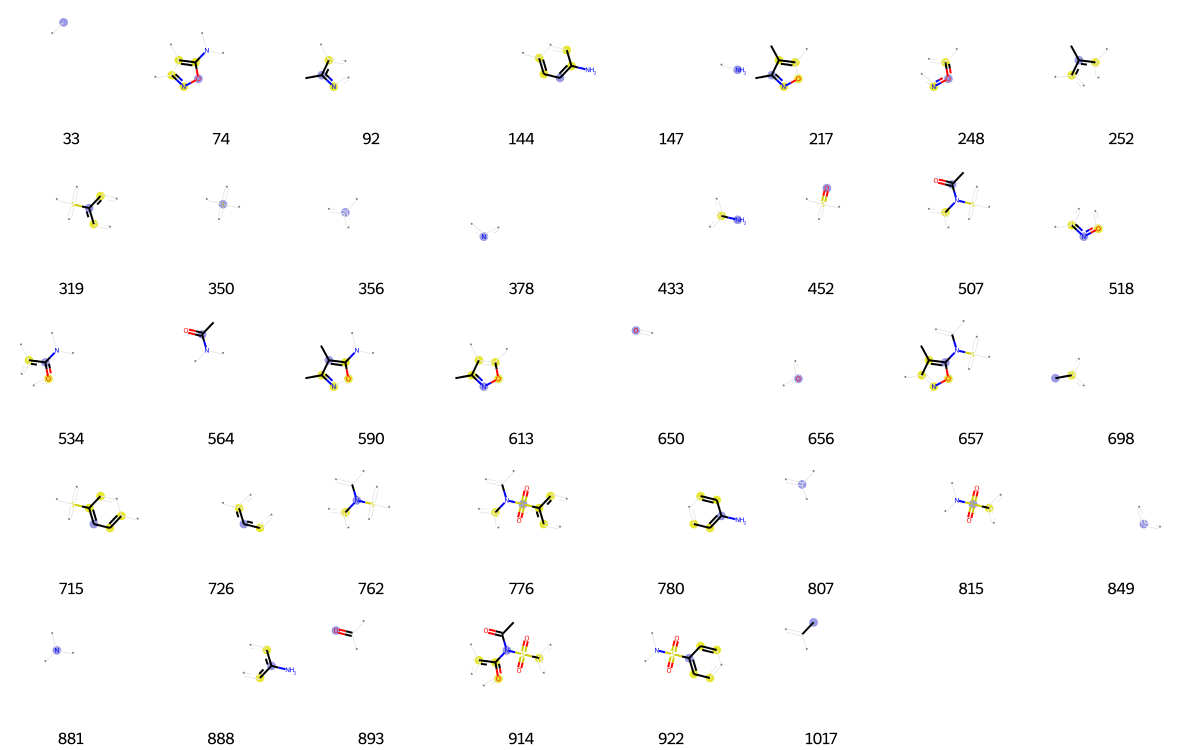

In [2416]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2417]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[33,
 91,
 108,
 212,
 224,
 231,
 249,
 270,
 285,
 325,
 333,
 356,
 360,
 441,
 512,
 575,
 646,
 649,
 656,
 695,
 711,
 714,
 723,
 776,
 822,
 835,
 839,
 841,
 849,
 868,
 875,
 881,
 899,
 914,
 926,
 944,
 946,
 1019]

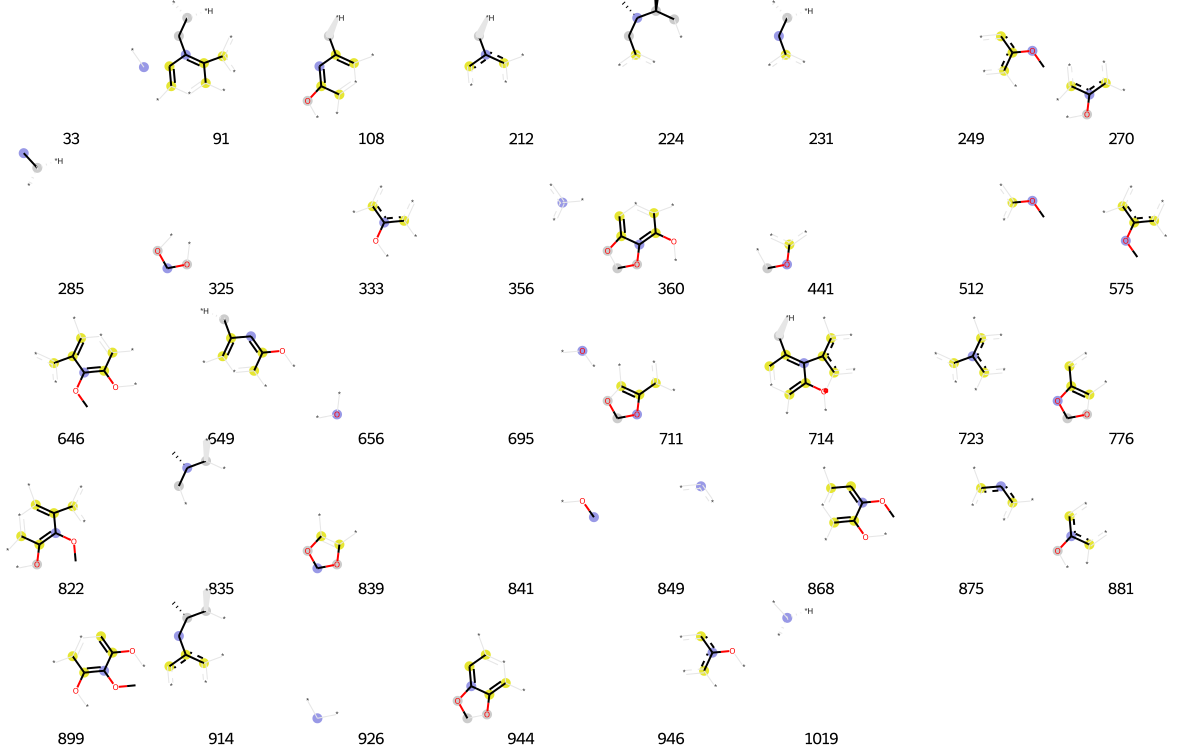

In [2418]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])